## **Market Basket Analysis in Python**

Welcome to this homework on Market Basket Analysis in Python. In this HW, you will learn how to:
* Identify patterns in consumer decision-making with the `mlxtend` package.
* Use metrics to evaluate the properties of patterns.
* Construct "rules" that provide concrete recommendations for businesses.
* Visualize patterns and rules using `seaborn` and `matplotlib`.

## **The dataset**

**We'll use a dataset from a Brazilian ecommerce site (olist.com) that is divided into three CSV files:**

1. `olist_order_items_dataset.csv`
2. `olist_products_dataset.csv`
3. `product_category_name_translation.csv`

**The column definitions are as follows:**

`olist_order_items_dataset.csv`:

- `order_id`: The unique identifier for a transaction.
- `order_item_id`: The order of an item within a transaction.
- `product_id`: The unique identifier for a product.
- `price`: The product's price.

`olist_products_dataset.csv`:

- `product_id`: The unique identifier for a product.
- `product_category_name`: The name of an item's product category in Portuguese.
- `product_weight_g`: The product's weight in grams.
- `product_length_cm`: The product's length in centimeters.
- `product_width_cm`: The product's width in centimeters.
- `product_height_cm`: The product's height in centimeters.

`product_category_name_translation.csv`:

- `product_category_name`: The name of an item's product category in Portuguese.
- `product_category_name_english`: The name of an item's product category in English.


## **Data preparation**

The first step in any Market Basket Analysis (MBA) project is to determine what constitutes an **item**, an **itemset**, and a **transaction**. This will depend on the dataset we're using and the question we're attempting to answer.

* **Grocery store**
	* Item: Grocery
	* Itemset: Collection of groceries
	* Transaction: Basket of items purchased
* **Music streaming service**
	* Item: Song
	* Itemset: Collection of unique songs
	* Transaction: User song library
* **Ebook store**
	* Item: Ebook
	* Itemset: One or more ebooks
	* Transaction: User ebook library


**In this HW, we'll use a dataset of transactions from olist.com, a Brazilian ecommerce site.**
* 100,000+ orders over 2016-2018.
* Olist connects sellers to marketplaces.
* Seller can register products with Olist.
* Customer makes purchase at marketplace from Olist store.
* Seller fulfills orders.

**What is an item**?
  * A product purchased from Olist.

**What is an itemset?**
  * A collection of one or more product(s).

**What is a transaction?**
  * An itemset that corresponds to a customer's order.

In [53]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

# Set default asthetic parameters.
sns.set()

# Define path to data.
data_path = './data/'

In [54]:
# Load orders dataset.
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')

# Load products items dataset.
products = pd.read_csv(data_path+'olist_products_dataset.csv')

# Load translations dataset.
translations = pd.read_csv(data_path+'product_category_name_translation.csv')

In [16]:
# Print orders header.
orders.head()

order_id  order_item_id  \
0  b8bfa12431142333a0c84802f9529d87              1   
1  b8bfa12431142333a0c84802f9529d87              2   
2  b8bfa12431142333a0c84802f9529d87              3   
3  00010242fe8c5a6d1ba2dd792cb16214              1   
4  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id  price  
0  765a8070ece0f1383d0f5faf913dfb9b   81.0  
1  a41e356c76fab66334f36de622ecbd3a   99.3  
2  765a8070ece0f1383d0f5faf913dfb9b   81.0  
3  4244733e06e7ecb4970a6e2683c13e61   58.9  
4  e5f2d52b802189ee658865ca93d83a8f  239.9

In [17]:
# Print orders info.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ MB


In [7]:
# Print products header.
products.head()

product_id  product_category_name  product_weight_g  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria             225.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes            1000.0   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer             154.0   
3  cef67bcfe19066a932b7673e239eb23d                  bebes             371.0   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas             625.0   

   product_length_cm  product_height_cm  product_width_cm  
0               16.0               10.0              14.0  
1               30.0               18.0              20.0  
2               18.0                9.0              15.0  
3               26.0                4.0              26.0  
4               20.0               17.0              13.0

In [6]:
# Print products info.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.3+ MB


In [8]:
# Print translations header.
translations.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [9]:
# Print translations info.
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 632.0+ bytes


---
<center><h1> Problem Set 1</h1> </center>

---

### **Translating item category names**

**The product names are given in Portuguese.**
  * We'll translate the names to English using a `pandas` `DataFrame` named `translations`.
  * `.merge()` performs a join operation on columns or indices.
  * `on` is the column on which to perform the join.
  * `how` specifies which keys to use to perform the join. 

In [55]:
# Translate product names to English.
products = products.merge(translations, on='product_category_name', how="left")

# Print English names.
products['product_category_name_english']

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

### **Convert product IDs to product category names.**

**We can work with product IDs directly, but do not have product names.**
  * Map product IDs to product category names, which are available in `products`.
  * Use another `.merge()` with `orders` and subset of `products` columns.
  
**Using category names will also simplify the analysis, since there are fewer categories than products.**

In [56]:
# Define product category name in orders DataFrame. (your task)
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')
orders['product_category_name_english']=0
#orders['product_category_name_english']=translations['product_category_name_english']

In [57]:
products['product_category_name_english']=0
for i in range(len(products)):
    for j in range(len(translations)):
        if products['product_category_name'][i]==translations['product_category_name'][j]:
            products['product_category_name_english'][i]=translations['product_category_name_english'][j]
products.head()

C:\Users\user\AppData\Local\Temp/ipykernel_10568/165088667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['product_category_name_english'][i]=translations['product_category_name_english'][j]
d:\python\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


product_id  product_category_name  product_weight_g  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria             225.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes            1000.0   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer             154.0   
3  cef67bcfe19066a932b7673e239eb23d                  bebes             371.0   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas             625.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               30.0               18.0              20.0   
2               18.0                9.0              15.0   
3               26.0                4.0              26.0   
4               20.0               17.0              13.0   

  product_category_name_english  
0                       perfume  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

In [65]:
#因為資料超級龐大 要跑3-4小時 故有另存檔案備用
fn = 'order.xlsx'
wb = openpyxl.load_workbook(fn)
wb.active = 0
ws = wb.active
for i in range(len(orders)):
    print(i)
    for j in range(len(products)):
        if orders['product_id'][i]==products['product_id'][j]:
            orders['product_category_name_english'][i]=products['product_category_name_english'][j]
            ws.cell(column=5, row=i+1).value =products['product_category_name_english'][j]
            break
wb.save(fn)

0
1
2
3


C:\Users\user\AppData\Local\Temp/ipykernel_10568/4068474993.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['product_category_name_english'][i]=products['product_category_name_english'][j]


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703


5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342


6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982


8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621


10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
1021

11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
1158

12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
1295

14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
1431

15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
1568

16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
1705

18255
18256
18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
1842

19623
19624
19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
1978

20989
20990
20991
20992
20993
20994
20995
20996
20997
20998
20999
21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
2115

22355
22356
22357
22358
22359
22360
22361
22362
22363
22364
22365
22366
22367
22368
22369
22370
22371
22372
22373
22374
22375
22376
22377
22378
22379
22380
22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
2252

23721
23722
23723
23724
23725
23726
23727
23728
23729
23730
23731
23732
23733
23734
23735
23736
23737
23738
23739
23740
23741
23742
23743
23744
23745
23746
23747
23748
23749
23750
23751
23752
23753
23754
23755
23756
23757
23758
23759
23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
23786
23787
23788
23789
23790
23791
23792
23793
23794
23795
23796
23797
23798
23799
23800
23801
23802
23803
23804
23805
23806
23807
23808
23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
2388

25088
25089
25090
25091
25092
25093
25094
25095
25096
25097
25098
25099
25100
25101
25102
25103
25104
25105
25106
25107
25108
25109
25110
25111
25112
25113
25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25157
25158
25159
25160
25161
25162
25163
25164
25165
25166
25167
25168
25169
25170
25171
25172
25173
25174
25175
25176
25177
25178
25179
25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
2525

26454
26455
26456
26457
26458
26459
26460
26461
26462
26463
26464
26465
26466
26467
26468
26469
26470
26471
26472
26473
26474
26475
26476
26477
26478
26479
26480
26481
26482
26483
26484
26485
26486
26487
26488
26489
26490
26491
26492
26493
26494
26495
26496
26497
26498
26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26523
26524
26525
26526
26527
26528
26529
26530
26531
26532
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
2662

27820
27821
27822
27823
27824
27825
27826
27827
27828
27829
27830
27831
27832
27833
27834
27835
27836
27837
27838
27839
27840
27841
27842
27843
27844
27845
27846
27847
27848
27849
27850
27851
27852
27853
27854
27855
27856
27857
27858
27859
27860
27861
27862
27863
27864
27865
27866
27867
27868
27869
27870
27871
27872
27873
27874
27875
27876
27877
27878
27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
2798

29186
29187
29188
29189
29190
29191
29192
29193
29194
29195
29196
29197
29198
29199
29200
29201
29202
29203
29204
29205
29206
29207
29208
29209
29210
29211
29212
29213
29214
29215
29216
29217
29218
29219
29220
29221
29222
29223
29224
29225
29226
29227
29228
29229
29230
29231
29232
29233
29234
29235
29236
29237
29238
29239
29240
29241
29242
29243
29244
29245
29246
29247
29248
29249
29250
29251
29252
29253
29254
29255
29256
29257
29258
29259
29260
29261
29262
29263
29264
29265
29266
29267
29268
29269
29270
29271
29272
29273
29274
29275
29276
29277
29278
29279
29280
29281
29282
29283
29284
29285
29286
29287
29288
29289
29290
29291
29292
29293
29294
29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
29314
29315
29316
29317
29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
2935

30552
30553
30554
30555
30556
30557
30558
30559
30560
30561
30562
30563
30564
30565
30566
30567
30568
30569
30570
30571
30572
30573
30574
30575
30576
30577
30578
30579
30580
30581
30582
30583
30584
30585
30586
30587
30588
30589
30590
30591
30592
30593
30594
30595
30596
30597
30598
30599
30600
30601
30602
30603
30604
30605
30606
30607
30608
30609
30610
30611
30612
30613
30614
30615
30616
30617
30618
30619
30620
30621
30622
30623
30624
30625
30626
30627
30628
30629
30630
30631
30632
30633
30634
30635
30636
30637
30638
30639
30640
30641
30642
30643
30644
30645
30646
30647
30648
30649
30650
30651
30652
30653
30654
30655
30656
30657
30658
30659
30660
30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
3071

31919
31920
31921
31922
31923
31924
31925
31926
31927
31928
31929
31930
31931
31932
31933
31934
31935
31936
31937
31938
31939
31940
31941
31942
31943
31944
31945
31946
31947
31948
31949
31950
31951
31952
31953
31954
31955
31956
31957
31958
31959
31960
31961
31962
31963
31964
31965
31966
31967
31968
31969
31970
31971
31972
31973
31974
31975
31976
31977
31978
31979
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
3208

33286
33287
33288
33289
33290
33291
33292
33293
33294
33295
33296
33297
33298
33299
33300
33301
33302
33303
33304
33305
33306
33307
33308
33309
33310
33311
33312
33313
33314
33315
33316
33317
33318
33319
33320
33321
33322
33323
33324
33325
33326
33327
33328
33329
33330
33331
33332
33333
33334
33335
33336
33337
33338
33339
33340
33341
33342
33343
33344
33345
33346
33347
33348
33349
33350
33351
33352
33353
33354
33355
33356
33357
33358
33359
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
33388
33389
33390
33391
33392
33393
33394
33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
3345

34653
34654
34655
34656
34657
34658
34659
34660
34661
34662
34663
34664
34665
34666
34667
34668
34669
34670
34671
34672
34673
34674
34675
34676
34677
34678
34679
34680
34681
34682
34683
34684
34685
34686
34687
34688
34689
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34700
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34711
34712
34713
34714
34715
34716
34717
34718
34719
34720
34721
34722
34723
34724
34725
34726
34727
34728
34729
34730
34731
34732
34733
34734
34735
34736
34737
34738
34739
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34781
34782
34783
34784
34785
34786
34787
34788
34789
34790
34791
34792
34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
3481

36019
36020
36021
36022
36023
36024
36025
36026
36027
36028
36029
36030
36031
36032
36033
36034
36035
36036
36037
36038
36039
36040
36041
36042
36043
36044
36045
36046
36047
36048
36049
36050
36051
36052
36053
36054
36055
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
3618

37385
37386
37387
37388
37389
37390
37391
37392
37393
37394
37395
37396
37397
37398
37399
37400
37401
37402
37403
37404
37405
37406
37407
37408
37409
37410
37411
37412
37413
37414
37415
37416
37417
37418
37419
37420
37421
37422
37423
37424
37425
37426
37427
37428
37429
37430
37431
37432
37433
37434
37435
37436
37437
37438
37439
37440
37441
37442
37443
37444
37445
37446
37447
37448
37449
37450
37451
37452
37453
37454
37455
37456
37457
37458
37459
37460
37461
37462
37463
37464
37465
37466
37467
37468
37469
37470
37471
37472
37473
37474
37475
37476
37477
37478
37479
37480
37481
37482
37483
37484
37485
37486
37487
37488
37489
37490
37491
37492
37493
37494
37495
37496
37497
37498
37499
37500
37501
37502
37503
37504
37505
37506
37507
37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
3755

38751
38752
38753
38754
38755
38756
38757
38758
38759
38760
38761
38762
38763
38764
38765
38766
38767
38768
38769
38770
38771
38772
38773
38774
38775
38776
38777
38778
38779
38780
38781
38782
38783
38784
38785
38786
38787
38788
38789
38790
38791
38792
38793
38794
38795
38796
38797
38798
38799
38800
38801
38802
38803
38804
38805
38806
38807
38808
38809
38810
38811
38812
38813
38814
38815
38816
38817
38818
38819
38820
38821
38822
38823
38824
38825
38826
38827
38828
38829
38830
38831
38832
38833
38834
38835
38836
38837
38838
38839
38840
38841
38842
38843
38844
38845
38846
38847
38848
38849
38850
38851
38852
38853
38854
38855
38856
38857
38858
38859
38860
38861
38862
38863
38864
38865
38866
38867
38868
38869
38870
38871
38872
38873
38874
38875
38876
38877
38878
38879
38880
38881
38882
38883
38884
38885
38886
38887
38888
38889
38890
38891
38892
38893
38894
38895
38896
38897
38898
38899
38900
38901
38902
38903
38904
38905
38906
38907
38908
38909
38910
38911
38912
38913
38914
38915
38916
3891

40120
40121
40122
40123
40124
40125
40126
40127
40128
40129
40130
40131
40132
40133
40134
40135
40136
40137
40138
40139
40140
40141
40142
40143
40144
40145
40146
40147
40148
40149
40150
40151
40152
40153
40154
40155
40156
40157
40158
40159
40160
40161
40162
40163
40164
40165
40166
40167
40168
40169
40170
40171
40172
40173
40174
40175
40176
40177
40178
40179
40180
40181
40182
40183
40184
40185
40186
40187
40188
40189
40190
40191
40192
40193
40194
40195
40196
40197
40198
40199
40200
40201
40202
40203
40204
40205
40206
40207
40208
40209
40210
40211
40212
40213
40214
40215
40216
40217
40218
40219
40220
40221
40222
40223
40224
40225
40226
40227
40228
40229
40230
40231
40232
40233
40234
40235
40236
40237
40238
40239
40240
40241
40242
40243
40244
40245
40246
40247
40248
40249
40250
40251
40252
40253
40254
40255
40256
40257
40258
40259
40260
40261
40262
40263
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
40275
40276
40277
40278
40279
40280
40281
40282
40283
40284
40285
4028

41486
41487
41488
41489
41490
41491
41492
41493
41494
41495
41496
41497
41498
41499
41500
41501
41502
41503
41504
41505
41506
41507
41508
41509
41510
41511
41512
41513
41514
41515
41516
41517
41518
41519
41520
41521
41522
41523
41524
41525
41526
41527
41528
41529
41530
41531
41532
41533
41534
41535
41536
41537
41538
41539
41540
41541
41542
41543
41544
41545
41546
41547
41548
41549
41550
41551
41552
41553
41554
41555
41556
41557
41558
41559
41560
41561
41562
41563
41564
41565
41566
41567
41568
41569
41570
41571
41572
41573
41574
41575
41576
41577
41578
41579
41580
41581
41582
41583
41584
41585
41586
41587
41588
41589
41590
41591
41592
41593
41594
41595
41596
41597
41598
41599
41600
41601
41602
41603
41604
41605
41606
41607
41608
41609
41610
41611
41612
41613
41614
41615
41616
41617
41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
4165

42853
42854
42855
42856
42857
42858
42859
42860
42861
42862
42863
42864
42865
42866
42867
42868
42869
42870
42871
42872
42873
42874
42875
42876
42877
42878
42879
42880
42881
42882
42883
42884
42885
42886
42887
42888
42889
42890
42891
42892
42893
42894
42895
42896
42897
42898
42899
42900
42901
42902
42903
42904
42905
42906
42907
42908
42909
42910
42911
42912
42913
42914
42915
42916
42917
42918
42919
42920
42921
42922
42923
42924
42925
42926
42927
42928
42929
42930
42931
42932
42933
42934
42935
42936
42937
42938
42939
42940
42941
42942
42943
42944
42945
42946
42947
42948
42949
42950
42951
42952
42953
42954
42955
42956
42957
42958
42959
42960
42961
42962
42963
42964
42965
42966
42967
42968
42969
42970
42971
42972
42973
42974
42975
42976
42977
42978
42979
42980
42981
42982
42983
42984
42985
42986
42987
42988
42989
42990
42991
42992
42993
42994
42995
42996
42997
42998
42999
43000
43001
43002
43003
43004
43005
43006
43007
43008
43009
43010
43011
43012
43013
43014
43015
43016
43017
43018
4301

44219
44220
44221
44222
44223
44224
44225
44226
44227
44228
44229
44230
44231
44232
44233
44234
44235
44236
44237
44238
44239
44240
44241
44242
44243
44244
44245
44246
44247
44248
44249
44250
44251
44252
44253
44254
44255
44256
44257
44258
44259
44260
44261
44262
44263
44264
44265
44266
44267
44268
44269
44270
44271
44272
44273
44274
44275
44276
44277
44278
44279
44280
44281
44282
44283
44284
44285
44286
44287
44288
44289
44290
44291
44292
44293
44294
44295
44296
44297
44298
44299
44300
44301
44302
44303
44304
44305
44306
44307
44308
44309
44310
44311
44312
44313
44314
44315
44316
44317
44318
44319
44320
44321
44322
44323
44324
44325
44326
44327
44328
44329
44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
4438

45585
45586
45587
45588
45589
45590
45591
45592
45593
45594
45595
45596
45597
45598
45599
45600
45601
45602
45603
45604
45605
45606
45607
45608
45609
45610
45611
45612
45613
45614
45615
45616
45617
45618
45619
45620
45621
45622
45623
45624
45625
45626
45627
45628
45629
45630
45631
45632
45633
45634
45635
45636
45637
45638
45639
45640
45641
45642
45643
45644
45645
45646
45647
45648
45649
45650
45651
45652
45653
45654
45655
45656
45657
45658
45659
45660
45661
45662
45663
45664
45665
45666
45667
45668
45669
45670
45671
45672
45673
45674
45675
45676
45677
45678
45679
45680
45681
45682
45683
45684
45685
45686
45687
45688
45689
45690
45691
45692
45693
45694
45695
45696
45697
45698
45699
45700
45701
45702
45703
45704
45705
45706
45707
45708
45709
45710
45711
45712
45713
45714
45715
45716
45717
45718
45719
45720
45721
45722
45723
45724
45725
45726
45727
45728
45729
45730
45731
45732
45733
45734
45735
45736
45737
45738
45739
45740
45741
45742
45743
45744
45745
45746
45747
45748
45749
45750
4575

46951
46952
46953
46954
46955
46956
46957
46958
46959
46960
46961
46962
46963
46964
46965
46966
46967
46968
46969
46970
46971
46972
46973
46974
46975
46976
46977
46978
46979
46980
46981
46982
46983
46984
46985
46986
46987
46988
46989
46990
46991
46992
46993
46994
46995
46996
46997
46998
46999
47000
47001
47002
47003
47004
47005
47006
47007
47008
47009
47010
47011
47012
47013
47014
47015
47016
47017
47018
47019
47020
47021
47022
47023
47024
47025
47026
47027
47028
47029
47030
47031
47032
47033
47034
47035
47036
47037
47038
47039
47040
47041
47042
47043
47044
47045
47046
47047
47048
47049
47050
47051
47052
47053
47054
47055
47056
47057
47058
47059
47060
47061
47062
47063
47064
47065
47066
47067
47068
47069
47070
47071
47072
47073
47074
47075
47076
47077
47078
47079
47080
47081
47082
47083
47084
47085
47086
47087
47088
47089
47090
47091
47092
47093
47094
47095
47096
47097
47098
47099
47100
47101
47102
47103
47104
47105
47106
47107
47108
47109
47110
47111
47112
47113
47114
47115
47116
4711

48317
48318
48319
48320
48321
48322
48323
48324
48325
48326
48327
48328
48329
48330
48331
48332
48333
48334
48335
48336
48337
48338
48339
48340
48341
48342
48343
48344
48345
48346
48347
48348
48349
48350
48351
48352
48353
48354
48355
48356
48357
48358
48359
48360
48361
48362
48363
48364
48365
48366
48367
48368
48369
48370
48371
48372
48373
48374
48375
48376
48377
48378
48379
48380
48381
48382
48383
48384
48385
48386
48387
48388
48389
48390
48391
48392
48393
48394
48395
48396
48397
48398
48399
48400
48401
48402
48403
48404
48405
48406
48407
48408
48409
48410
48411
48412
48413
48414
48415
48416
48417
48418
48419
48420
48421
48422
48423
48424
48425
48426
48427
48428
48429
48430
48431
48432
48433
48434
48435
48436
48437
48438
48439
48440
48441
48442
48443
48444
48445
48446
48447
48448
48449
48450
48451
48452
48453
48454
48455
48456
48457
48458
48459
48460
48461
48462
48463
48464
48465
48466
48467
48468
48469
48470
48471
48472
48473
48474
48475
48476
48477
48478
48479
48480
48481
48482
4848

49684
49685
49686
49687
49688
49689
49690
49691
49692
49693
49694
49695
49696
49697
49698
49699
49700
49701
49702
49703
49704
49705
49706
49707
49708
49709
49710
49711
49712
49713
49714
49715
49716
49717
49718
49719
49720
49721
49722
49723
49724
49725
49726
49727
49728
49729
49730
49731
49732
49733
49734
49735
49736
49737
49738
49739
49740
49741
49742
49743
49744
49745
49746
49747
49748
49749
49750
49751
49752
49753
49754
49755
49756
49757
49758
49759
49760
49761
49762
49763
49764
49765
49766
49767
49768
49769
49770
49771
49772
49773
49774
49775
49776
49777
49778
49779
49780
49781
49782
49783
49784
49785
49786
49787
49788
49789
49790
49791
49792
49793
49794
49795
49796
49797
49798
49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
4985

51050
51051
51052
51053
51054
51055
51056
51057
51058
51059
51060
51061
51062
51063
51064
51065
51066
51067
51068
51069
51070
51071
51072
51073
51074
51075
51076
51077
51078
51079
51080
51081
51082
51083
51084
51085
51086
51087
51088
51089
51090
51091
51092
51093
51094
51095
51096
51097
51098
51099
51100
51101
51102
51103
51104
51105
51106
51107
51108
51109
51110
51111
51112
51113
51114
51115
51116
51117
51118
51119
51120
51121
51122
51123
51124
51125
51126
51127
51128
51129
51130
51131
51132
51133
51134
51135
51136
51137
51138
51139
51140
51141
51142
51143
51144
51145
51146
51147
51148
51149
51150
51151
51152
51153
51154
51155
51156
51157
51158
51159
51160
51161
51162
51163
51164
51165
51166
51167
51168
51169
51170
51171
51172
51173
51174
51175
51176
51177
51178
51179
51180
51181
51182
51183
51184
51185
51186
51187
51188
51189
51190
51191
51192
51193
51194
51195
51196
51197
51198
51199
51200
51201
51202
51203
51204
51205
51206
51207
51208
51209
51210
51211
51212
51213
51214
51215
5121

52416
52417
52418
52419
52420
52421
52422
52423
52424
52425
52426
52427
52428
52429
52430
52431
52432
52433
52434
52435
52436
52437
52438
52439
52440
52441
52442
52443
52444
52445
52446
52447
52448
52449
52450
52451
52452
52453
52454
52455
52456
52457
52458
52459
52460
52461
52462
52463
52464
52465
52466
52467
52468
52469
52470
52471
52472
52473
52474
52475
52476
52477
52478
52479
52480
52481
52482
52483
52484
52485
52486
52487
52488
52489
52490
52491
52492
52493
52494
52495
52496
52497
52498
52499
52500
52501
52502
52503
52504
52505
52506
52507
52508
52509
52510
52511
52512
52513
52514
52515
52516
52517
52518
52519
52520
52521
52522
52523
52524
52525
52526
52527
52528
52529
52530
52531
52532
52533
52534
52535
52536
52537
52538
52539
52540
52541
52542
52543
52544
52545
52546
52547
52548
52549
52550
52551
52552
52553
52554
52555
52556
52557
52558
52559
52560
52561
52562
52563
52564
52565
52566
52567
52568
52569
52570
52571
52572
52573
52574
52575
52576
52577
52578
52579
52580
52581
5258

53782
53783
53784
53785
53786
53787
53788
53789
53790
53791
53792
53793
53794
53795
53796
53797
53798
53799
53800
53801
53802
53803
53804
53805
53806
53807
53808
53809
53810
53811
53812
53813
53814
53815
53816
53817
53818
53819
53820
53821
53822
53823
53824
53825
53826
53827
53828
53829
53830
53831
53832
53833
53834
53835
53836
53837
53838
53839
53840
53841
53842
53843
53844
53845
53846
53847
53848
53849
53850
53851
53852
53853
53854
53855
53856
53857
53858
53859
53860
53861
53862
53863
53864
53865
53866
53867
53868
53869
53870
53871
53872
53873
53874
53875
53876
53877
53878
53879
53880
53881
53882
53883
53884
53885
53886
53887
53888
53889
53890
53891
53892
53893
53894
53895
53896
53897
53898
53899
53900
53901
53902
53903
53904
53905
53906
53907
53908
53909
53910
53911
53912
53913
53914
53915
53916
53917
53918
53919
53920
53921
53922
53923
53924
53925
53926
53927
53928
53929
53930
53931
53932
53933
53934
53935
53936
53937
53938
53939
53940
53941
53942
53943
53944
53945
53946
53947
5394

55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
55160
55161
55162
55163
55164
55165
55166
55167
55168
55169
55170
55171
55172
55173
55174
55175
55176
55177
55178
55179
55180
55181
55182
55183
55184
55185
55186
55187
55188
55189
55190
55191
55192
55193
55194
55195
55196
55197
55198
55199
55200
55201
55202
55203
55204
55205
55206
55207
55208
55209
55210
55211
55212
55213
55214
55215
55216
55217
55218
55219
55220
55221
55222
55223
55224
55225
55226
55227
55228
55229
55230
55231
55232
55233
55234
55235
55236
55237
55238
55239
55240
55241
55242
55243
55244
55245
55246
55247
55248
55249
55250
55251
55252
55253
55254
55255
55256
55257
55258
55259
55260
55261
55262
55263
55264
55265
55266
55267
55268
55269
55270
55271
55272
55273
55274
55275
55276
55277
55278
55279
55280
55281
55282
55283
55284
55285
55286
55287
55288
55289
55290
55291
55292
55293
55294
55295
55296
55297
55298
55299
55300
55301
55302
55303
55304
55305
55306
55307
55308
55309
55310
55311
55312
55313
55314
5531

56517
56518
56519
56520
56521
56522
56523
56524
56525
56526
56527
56528
56529
56530
56531
56532
56533
56534
56535
56536
56537
56538
56539
56540
56541
56542
56543
56544
56545
56546
56547
56548
56549
56550
56551
56552
56553
56554
56555
56556
56557
56558
56559
56560
56561
56562
56563
56564
56565
56566
56567
56568
56569
56570
56571
56572
56573
56574
56575
56576
56577
56578
56579
56580
56581
56582
56583
56584
56585
56586
56587
56588
56589
56590
56591
56592
56593
56594
56595
56596
56597
56598
56599
56600
56601
56602
56603
56604
56605
56606
56607
56608
56609
56610
56611
56612
56613
56614
56615
56616
56617
56618
56619
56620
56621
56622
56623
56624
56625
56626
56627
56628
56629
56630
56631
56632
56633
56634
56635
56636
56637
56638
56639
56640
56641
56642
56643
56644
56645
56646
56647
56648
56649
56650
56651
56652
56653
56654
56655
56656
56657
56658
56659
56660
56661
56662
56663
56664
56665
56666
56667
56668
56669
56670
56671
56672
56673
56674
56675
56676
56677
56678
56679
56680
56681
56682
5668

57886
57887
57888
57889
57890
57891
57892
57893
57894
57895
57896
57897
57898
57899
57900
57901
57902
57903
57904
57905
57906
57907
57908
57909
57910
57911
57912
57913
57914
57915
57916
57917
57918
57919
57920
57921
57922
57923
57924
57925
57926
57927
57928
57929
57930
57931
57932
57933
57934
57935
57936
57937
57938
57939
57940
57941
57942
57943
57944
57945
57946
57947
57948
57949
57950
57951
57952
57953
57954
57955
57956
57957
57958
57959
57960
57961
57962
57963
57964
57965
57966
57967
57968
57969
57970
57971
57972
57973
57974
57975
57976
57977
57978
57979
57980
57981
57982
57983
57984
57985
57986
57987
57988
57989
57990
57991
57992
57993
57994
57995
57996
57997
57998
57999
58000
58001
58002
58003
58004
58005
58006
58007
58008
58009
58010
58011
58012
58013
58014
58015
58016
58017
58018
58019
58020
58021
58022
58023
58024
58025
58026
58027
58028
58029
58030
58031
58032
58033
58034
58035
58036
58037
58038
58039
58040
58041
58042
58043
58044
58045
58046
58047
58048
58049
58050
58051
5805

59253
59254
59255
59256
59257
59258
59259
59260
59261
59262
59263
59264
59265
59266
59267
59268
59269
59270
59271
59272
59273
59274
59275
59276
59277
59278
59279
59280
59281
59282
59283
59284
59285
59286
59287
59288
59289
59290
59291
59292
59293
59294
59295
59296
59297
59298
59299
59300
59301
59302
59303
59304
59305
59306
59307
59308
59309
59310
59311
59312
59313
59314
59315
59316
59317
59318
59319
59320
59321
59322
59323
59324
59325
59326
59327
59328
59329
59330
59331
59332
59333
59334
59335
59336
59337
59338
59339
59340
59341
59342
59343
59344
59345
59346
59347
59348
59349
59350
59351
59352
59353
59354
59355
59356
59357
59358
59359
59360
59361
59362
59363
59364
59365
59366
59367
59368
59369
59370
59371
59372
59373
59374
59375
59376
59377
59378
59379
59380
59381
59382
59383
59384
59385
59386
59387
59388
59389
59390
59391
59392
59393
59394
59395
59396
59397
59398
59399
59400
59401
59402
59403
59404
59405
59406
59407
59408
59409
59410
59411
59412
59413
59414
59415
59416
59417
59418
5941

60619
60620
60621
60622
60623
60624
60625
60626
60627
60628
60629
60630
60631
60632
60633
60634
60635
60636
60637
60638
60639
60640
60641
60642
60643
60644
60645
60646
60647
60648
60649
60650
60651
60652
60653
60654
60655
60656
60657
60658
60659
60660
60661
60662
60663
60664
60665
60666
60667
60668
60669
60670
60671
60672
60673
60674
60675
60676
60677
60678
60679
60680
60681
60682
60683
60684
60685
60686
60687
60688
60689
60690
60691
60692
60693
60694
60695
60696
60697
60698
60699
60700
60701
60702
60703
60704
60705
60706
60707
60708
60709
60710
60711
60712
60713
60714
60715
60716
60717
60718
60719
60720
60721
60722
60723
60724
60725
60726
60727
60728
60729
60730
60731
60732
60733
60734
60735
60736
60737
60738
60739
60740
60741
60742
60743
60744
60745
60746
60747
60748
60749
60750
60751
60752
60753
60754
60755
60756
60757
60758
60759
60760
60761
60762
60763
60764
60765
60766
60767
60768
60769
60770
60771
60772
60773
60774
60775
60776
60777
60778
60779
60780
60781
60782
60783
60784
6078

61985
61986
61987
61988
61989
61990
61991
61992
61993
61994
61995
61996
61997
61998
61999
62000
62001
62002
62003
62004
62005
62006
62007
62008
62009
62010
62011
62012
62013
62014
62015
62016
62017
62018
62019
62020
62021
62022
62023
62024
62025
62026
62027
62028
62029
62030
62031
62032
62033
62034
62035
62036
62037
62038
62039
62040
62041
62042
62043
62044
62045
62046
62047
62048
62049
62050
62051
62052
62053
62054
62055
62056
62057
62058
62059
62060
62061
62062
62063
62064
62065
62066
62067
62068
62069
62070
62071
62072
62073
62074
62075
62076
62077
62078
62079
62080
62081
62082
62083
62084
62085
62086
62087
62088
62089
62090
62091
62092
62093
62094
62095
62096
62097
62098
62099
62100
62101
62102
62103
62104
62105
62106
62107
62108
62109
62110
62111
62112
62113
62114
62115
62116
62117
62118
62119
62120
62121
62122
62123
62124
62125
62126
62127
62128
62129
62130
62131
62132
62133
62134
62135
62136
62137
62138
62139
62140
62141
62142
62143
62144
62145
62146
62147
62148
62149
62150
6215

63351
63352
63353
63354
63355
63356
63357
63358
63359
63360
63361
63362
63363
63364
63365
63366
63367
63368
63369
63370
63371
63372
63373
63374
63375
63376
63377
63378
63379
63380
63381
63382
63383
63384
63385
63386
63387
63388
63389
63390
63391
63392
63393
63394
63395
63396
63397
63398
63399
63400
63401
63402
63403
63404
63405
63406
63407
63408
63409
63410
63411
63412
63413
63414
63415
63416
63417
63418
63419
63420
63421
63422
63423
63424
63425
63426
63427
63428
63429
63430
63431
63432
63433
63434
63435
63436
63437
63438
63439
63440
63441
63442
63443
63444
63445
63446
63447
63448
63449
63450
63451
63452
63453
63454
63455
63456
63457
63458
63459
63460
63461
63462
63463
63464
63465
63466
63467
63468
63469
63470
63471
63472
63473
63474
63475
63476
63477
63478
63479
63480
63481
63482
63483
63484
63485
63486
63487
63488
63489
63490
63491
63492
63493
63494
63495
63496
63497
63498
63499
63500
63501
63502
63503
63504
63505
63506
63507
63508
63509
63510
63511
63512
63513
63514
63515
63516
6351

64720
64721
64722
64723
64724
64725
64726
64727
64728
64729
64730
64731
64732
64733
64734
64735
64736
64737
64738
64739
64740
64741
64742
64743
64744
64745
64746
64747
64748
64749
64750
64751
64752
64753
64754
64755
64756
64757
64758
64759
64760
64761
64762
64763
64764
64765
64766
64767
64768
64769
64770
64771
64772
64773
64774
64775
64776
64777
64778
64779
64780
64781
64782
64783
64784
64785
64786
64787
64788
64789
64790
64791
64792
64793
64794
64795
64796
64797
64798
64799
64800
64801
64802
64803
64804
64805
64806
64807
64808
64809
64810
64811
64812
64813
64814
64815
64816
64817
64818
64819
64820
64821
64822
64823
64824
64825
64826
64827
64828
64829
64830
64831
64832
64833
64834
64835
64836
64837
64838
64839
64840
64841
64842
64843
64844
64845
64846
64847
64848
64849
64850
64851
64852
64853
64854
64855
64856
64857
64858
64859
64860
64861
64862
64863
64864
64865
64866
64867
64868
64869
64870
64871
64872
64873
64874
64875
64876
64877
64878
64879
64880
64881
64882
64883
64884
64885
6488

66088
66089
66090
66091
66092
66093
66094
66095
66096
66097
66098
66099
66100
66101
66102
66103
66104
66105
66106
66107
66108
66109
66110
66111
66112
66113
66114
66115
66116
66117
66118
66119
66120
66121
66122
66123
66124
66125
66126
66127
66128
66129
66130
66131
66132
66133
66134
66135
66136
66137
66138
66139
66140
66141
66142
66143
66144
66145
66146
66147
66148
66149
66150
66151
66152
66153
66154
66155
66156
66157
66158
66159
66160
66161
66162
66163
66164
66165
66166
66167
66168
66169
66170
66171
66172
66173
66174
66175
66176
66177
66178
66179
66180
66181
66182
66183
66184
66185
66186
66187
66188
66189
66190
66191
66192
66193
66194
66195
66196
66197
66198
66199
66200
66201
66202
66203
66204
66205
66206
66207
66208
66209
66210
66211
66212
66213
66214
66215
66216
66217
66218
66219
66220
66221
66222
66223
66224
66225
66226
66227
66228
66229
66230
66231
66232
66233
66234
66235
66236
66237
66238
66239
66240
66241
66242
66243
66244
66245
66246
66247
66248
66249
66250
66251
66252
66253
6625

67455
67456
67457
67458
67459
67460
67461
67462
67463
67464
67465
67466
67467
67468
67469
67470
67471
67472
67473
67474
67475
67476
67477
67478
67479
67480
67481
67482
67483
67484
67485
67486
67487
67488
67489
67490
67491
67492
67493
67494
67495
67496
67497
67498
67499
67500
67501
67502
67503
67504
67505
67506
67507
67508
67509
67510
67511
67512
67513
67514
67515
67516
67517
67518
67519
67520
67521
67522
67523
67524
67525
67526
67527
67528
67529
67530
67531
67532
67533
67534
67535
67536
67537
67538
67539
67540
67541
67542
67543
67544
67545
67546
67547
67548
67549
67550
67551
67552
67553
67554
67555
67556
67557
67558
67559
67560
67561
67562
67563
67564
67565
67566
67567
67568
67569
67570
67571
67572
67573
67574
67575
67576
67577
67578
67579
67580
67581
67582
67583
67584
67585
67586
67587
67588
67589
67590
67591
67592
67593
67594
67595
67596
67597
67598
67599
67600
67601
67602
67603
67604
67605
67606
67607
67608
67609
67610
67611
67612
67613
67614
67615
67616
67617
67618
67619
67620
6762

68821
68822
68823
68824
68825
68826
68827
68828
68829
68830
68831
68832
68833
68834
68835
68836
68837
68838
68839
68840
68841
68842
68843
68844
68845
68846
68847
68848
68849
68850
68851
68852
68853
68854
68855
68856
68857
68858
68859
68860
68861
68862
68863
68864
68865
68866
68867
68868
68869
68870
68871
68872
68873
68874
68875
68876
68877
68878
68879
68880
68881
68882
68883
68884
68885
68886
68887
68888
68889
68890
68891
68892
68893
68894
68895
68896
68897
68898
68899
68900
68901
68902
68903
68904
68905
68906
68907
68908
68909
68910
68911
68912
68913
68914
68915
68916
68917
68918
68919
68920
68921
68922
68923
68924
68925
68926
68927
68928
68929
68930
68931
68932
68933
68934
68935
68936
68937
68938
68939
68940
68941
68942
68943
68944
68945
68946
68947
68948
68949
68950
68951
68952
68953
68954
68955
68956
68957
68958
68959
68960
68961
68962
68963
68964
68965
68966
68967
68968
68969
68970
68971
68972
68973
68974
68975
68976
68977
68978
68979
68980
68981
68982
68983
68984
68985
68986
6898

70192
70193
70194
70195
70196
70197
70198
70199
70200
70201
70202
70203
70204
70205
70206
70207
70208
70209
70210
70211
70212
70213
70214
70215
70216
70217
70218
70219
70220
70221
70222
70223
70224
70225
70226
70227
70228
70229
70230
70231
70232
70233
70234
70235
70236
70237
70238
70239
70240
70241
70242
70243
70244
70245
70246
70247
70248
70249
70250
70251
70252
70253
70254
70255
70256
70257
70258
70259
70260
70261
70262
70263
70264
70265
70266
70267
70268
70269
70270
70271
70272
70273
70274
70275
70276
70277
70278
70279
70280
70281
70282
70283
70284
70285
70286
70287
70288
70289
70290
70291
70292
70293
70294
70295
70296
70297
70298
70299
70300
70301
70302
70303
70304
70305
70306
70307
70308
70309
70310
70311
70312
70313
70314
70315
70316
70317
70318
70319
70320
70321
70322
70323
70324
70325
70326
70327
70328
70329
70330
70331
70332
70333
70334
70335
70336
70337
70338
70339
70340
70341
70342
70343
70344
70345
70346
70347
70348
70349
70350
70351
70352
70353
70354
70355
70356
70357
7035

71558
71559
71560
71561
71562
71563
71564
71565
71566
71567
71568
71569
71570
71571
71572
71573
71574
71575
71576
71577
71578
71579
71580
71581
71582
71583
71584
71585
71586
71587
71588
71589
71590
71591
71592
71593
71594
71595
71596
71597
71598
71599
71600
71601
71602
71603
71604
71605
71606
71607
71608
71609
71610
71611
71612
71613
71614
71615
71616
71617
71618
71619
71620
71621
71622
71623
71624
71625
71626
71627
71628
71629
71630
71631
71632
71633
71634
71635
71636
71637
71638
71639
71640
71641
71642
71643
71644
71645
71646
71647
71648
71649
71650
71651
71652
71653
71654
71655
71656
71657
71658
71659
71660
71661
71662
71663
71664
71665
71666
71667
71668
71669
71670
71671
71672
71673
71674
71675
71676
71677
71678
71679
71680
71681
71682
71683
71684
71685
71686
71687
71688
71689
71690
71691
71692
71693
71694
71695
71696
71697
71698
71699
71700
71701
71702
71703
71704
71705
71706
71707
71708
71709
71710
71711
71712
71713
71714
71715
71716
71717
71718
71719
71720
71721
71722
71723
7172

72924
72925
72926
72927
72928
72929
72930
72931
72932
72933
72934
72935
72936
72937
72938
72939
72940
72941
72942
72943
72944
72945
72946
72947
72948
72949
72950
72951
72952
72953
72954
72955
72956
72957
72958
72959
72960
72961
72962
72963
72964
72965
72966
72967
72968
72969
72970
72971
72972
72973
72974
72975
72976
72977
72978
72979
72980
72981
72982
72983
72984
72985
72986
72987
72988
72989
72990
72991
72992
72993
72994
72995
72996
72997
72998
72999
73000
73001
73002
73003
73004
73005
73006
73007
73008
73009
73010
73011
73012
73013
73014
73015
73016
73017
73018
73019
73020
73021
73022
73023
73024
73025
73026
73027
73028
73029
73030
73031
73032
73033
73034
73035
73036
73037
73038
73039
73040
73041
73042
73043
73044
73045
73046
73047
73048
73049
73050
73051
73052
73053
73054
73055
73056
73057
73058
73059
73060
73061
73062
73063
73064
73065
73066
73067
73068
73069
73070
73071
73072
73073
73074
73075
73076
73077
73078
73079
73080
73081
73082
73083
73084
73085
73086
73087
73088
73089
7309

74290
74291
74292
74293
74294
74295
74296
74297
74298
74299
74300
74301
74302
74303
74304
74305
74306
74307
74308
74309
74310
74311
74312
74313
74314
74315
74316
74317
74318
74319
74320
74321
74322
74323
74324
74325
74326
74327
74328
74329
74330
74331
74332
74333
74334
74335
74336
74337
74338
74339
74340
74341
74342
74343
74344
74345
74346
74347
74348
74349
74350
74351
74352
74353
74354
74355
74356
74357
74358
74359
74360
74361
74362
74363
74364
74365
74366
74367
74368
74369
74370
74371
74372
74373
74374
74375
74376
74377
74378
74379
74380
74381
74382
74383
74384
74385
74386
74387
74388
74389
74390
74391
74392
74393
74394
74395
74396
74397
74398
74399
74400
74401
74402
74403
74404
74405
74406
74407
74408
74409
74410
74411
74412
74413
74414
74415
74416
74417
74418
74419
74420
74421
74422
74423
74424
74425
74426
74427
74428
74429
74430
74431
74432
74433
74434
74435
74436
74437
74438
74439
74440
74441
74442
74443
74444
74445
74446
74447
74448
74449
74450
74451
74452
74453
74454
74455
7445

75656
75657
75658
75659
75660
75661
75662
75663
75664
75665
75666
75667
75668
75669
75670
75671
75672
75673
75674
75675
75676
75677
75678
75679
75680
75681
75682
75683
75684
75685
75686
75687
75688
75689
75690
75691
75692
75693
75694
75695
75696
75697
75698
75699
75700
75701
75702
75703
75704
75705
75706
75707
75708
75709
75710
75711
75712
75713
75714
75715
75716
75717
75718
75719
75720
75721
75722
75723
75724
75725
75726
75727
75728
75729
75730
75731
75732
75733
75734
75735
75736
75737
75738
75739
75740
75741
75742
75743
75744
75745
75746
75747
75748
75749
75750
75751
75752
75753
75754
75755
75756
75757
75758
75759
75760
75761
75762
75763
75764
75765
75766
75767
75768
75769
75770
75771
75772
75773
75774
75775
75776
75777
75778
75779
75780
75781
75782
75783
75784
75785
75786
75787
75788
75789
75790
75791
75792
75793
75794
75795
75796
75797
75798
75799
75800
75801
75802
75803
75804
75805
75806
75807
75808
75809
75810
75811
75812
75813
75814
75815
75816
75817
75818
75819
75820
75821
7582

77023
77024
77025
77026
77027
77028
77029
77030
77031
77032
77033
77034
77035
77036
77037
77038
77039
77040
77041
77042
77043
77044
77045
77046
77047
77048
77049
77050
77051
77052
77053
77054
77055
77056
77057
77058
77059
77060
77061
77062
77063
77064
77065
77066
77067
77068
77069
77070
77071
77072
77073
77074
77075
77076
77077
77078
77079
77080
77081
77082
77083
77084
77085
77086
77087
77088
77089
77090
77091
77092
77093
77094
77095
77096
77097
77098
77099
77100
77101
77102
77103
77104
77105
77106
77107
77108
77109
77110
77111
77112
77113
77114
77115
77116
77117
77118
77119
77120
77121
77122
77123
77124
77125
77126
77127
77128
77129
77130
77131
77132
77133
77134
77135
77136
77137
77138
77139
77140
77141
77142
77143
77144
77145
77146
77147
77148
77149
77150
77151
77152
77153
77154
77155
77156
77157
77158
77159
77160
77161
77162
77163
77164
77165
77166
77167
77168
77169
77170
77171
77172
77173
77174
77175
77176
77177
77178
77179
77180
77181
77182
77183
77184
77185
77186
77187
77188
7718

78391
78392
78393
78394
78395
78396
78397
78398
78399
78400
78401
78402
78403
78404
78405
78406
78407
78408
78409
78410
78411
78412
78413
78414
78415
78416
78417
78418
78419
78420
78421
78422
78423
78424
78425
78426
78427
78428
78429
78430
78431
78432
78433
78434
78435
78436
78437
78438
78439
78440
78441
78442
78443
78444
78445
78446
78447
78448
78449
78450
78451
78452
78453
78454
78455
78456
78457
78458
78459
78460
78461
78462
78463
78464
78465
78466
78467
78468
78469
78470
78471
78472
78473
78474
78475
78476
78477
78478
78479
78480
78481
78482
78483
78484
78485
78486
78487
78488
78489
78490
78491
78492
78493
78494
78495
78496
78497
78498
78499
78500
78501
78502
78503
78504
78505
78506
78507
78508
78509
78510
78511
78512
78513
78514
78515
78516
78517
78518
78519
78520
78521
78522
78523
78524
78525
78526
78527
78528
78529
78530
78531
78532
78533
78534
78535
78536
78537
78538
78539
78540
78541
78542
78543
78544
78545
78546
78547
78548
78549
78550
78551
78552
78553
78554
78555
78556
7855

79759
79760
79761
79762
79763
79764
79765
79766
79767
79768
79769
79770
79771
79772
79773
79774
79775
79776
79777
79778
79779
79780
79781
79782
79783
79784
79785
79786
79787
79788
79789
79790
79791
79792
79793
79794
79795
79796
79797
79798
79799
79800
79801
79802
79803
79804
79805
79806
79807
79808
79809
79810
79811
79812
79813
79814
79815
79816
79817
79818
79819
79820
79821
79822
79823
79824
79825
79826
79827
79828
79829
79830
79831
79832
79833
79834
79835
79836
79837
79838
79839
79840
79841
79842
79843
79844
79845
79846
79847
79848
79849
79850
79851
79852
79853
79854
79855
79856
79857
79858
79859
79860
79861
79862
79863
79864
79865
79866
79867
79868
79869
79870
79871
79872
79873
79874
79875
79876
79877
79878
79879
79880
79881
79882
79883
79884
79885
79886
79887
79888
79889
79890
79891
79892
79893
79894
79895
79896
79897
79898
79899
79900
79901
79902
79903
79904
79905
79906
79907
79908
79909
79910
79911
79912
79913
79914
79915
79916
79917
79918
79919
79920
79921
79922
79923
79924
7992

81126
81127
81128
81129
81130
81131
81132
81133
81134
81135
81136
81137
81138
81139
81140
81141
81142
81143
81144
81145
81146
81147
81148
81149
81150
81151
81152
81153
81154
81155
81156
81157
81158
81159
81160
81161
81162
81163
81164
81165
81166
81167
81168
81169
81170
81171
81172
81173
81174
81175
81176
81177
81178
81179
81180
81181
81182
81183
81184
81185
81186
81187
81188
81189
81190
81191
81192
81193
81194
81195
81196
81197
81198
81199
81200
81201
81202
81203
81204
81205
81206
81207
81208
81209
81210
81211
81212
81213
81214
81215
81216
81217
81218
81219
81220
81221
81222
81223
81224
81225
81226
81227
81228
81229
81230
81231
81232
81233
81234
81235
81236
81237
81238
81239
81240
81241
81242
81243
81244
81245
81246
81247
81248
81249
81250
81251
81252
81253
81254
81255
81256
81257
81258
81259
81260
81261
81262
81263
81264
81265
81266
81267
81268
81269
81270
81271
81272
81273
81274
81275
81276
81277
81278
81279
81280
81281
81282
81283
81284
81285
81286
81287
81288
81289
81290
81291
8129

82493
82494
82495
82496
82497
82498
82499
82500
82501
82502
82503
82504
82505
82506
82507
82508
82509
82510
82511
82512
82513
82514
82515
82516
82517
82518
82519
82520
82521
82522
82523
82524
82525
82526
82527
82528
82529
82530
82531
82532
82533
82534
82535
82536
82537
82538
82539
82540
82541
82542
82543
82544
82545
82546
82547
82548
82549
82550
82551
82552
82553
82554
82555
82556
82557
82558
82559
82560
82561
82562
82563
82564
82565
82566
82567
82568
82569
82570
82571
82572
82573
82574
82575
82576
82577
82578
82579
82580
82581
82582
82583
82584
82585
82586
82587
82588
82589
82590
82591
82592
82593
82594
82595
82596
82597
82598
82599
82600
82601
82602
82603
82604
82605
82606
82607
82608
82609
82610
82611
82612
82613
82614
82615
82616
82617
82618
82619
82620
82621
82622
82623
82624
82625
82626
82627
82628
82629
82630
82631
82632
82633
82634
82635
82636
82637
82638
82639
82640
82641
82642
82643
82644
82645
82646
82647
82648
82649
82650
82651
82652
82653
82654
82655
82656
82657
82658
8265

83859
83860
83861
83862
83863
83864
83865
83866
83867
83868
83869
83870
83871
83872
83873
83874
83875
83876
83877
83878
83879
83880
83881
83882
83883
83884
83885
83886
83887
83888
83889
83890
83891
83892
83893
83894
83895
83896
83897
83898
83899
83900
83901
83902
83903
83904
83905
83906
83907
83908
83909
83910
83911
83912
83913
83914
83915
83916
83917
83918
83919
83920
83921
83922
83923
83924
83925
83926
83927
83928
83929
83930
83931
83932
83933
83934
83935
83936
83937
83938
83939
83940
83941
83942
83943
83944
83945
83946
83947
83948
83949
83950
83951
83952
83953
83954
83955
83956
83957
83958
83959
83960
83961
83962
83963
83964
83965
83966
83967
83968
83969
83970
83971
83972
83973
83974
83975
83976
83977
83978
83979
83980
83981
83982
83983
83984
83985
83986
83987
83988
83989
83990
83991
83992
83993
83994
83995
83996
83997
83998
83999
84000
84001
84002
84003
84004
84005
84006
84007
84008
84009
84010
84011
84012
84013
84014
84015
84016
84017
84018
84019
84020
84021
84022
84023
84024
8402

85226
85227
85228
85229
85230
85231
85232
85233
85234
85235
85236
85237
85238
85239
85240
85241
85242
85243
85244
85245
85246
85247
85248
85249
85250
85251
85252
85253
85254
85255
85256
85257
85258
85259
85260
85261
85262
85263
85264
85265
85266
85267
85268
85269
85270
85271
85272
85273
85274
85275
85276
85277
85278
85279
85280
85281
85282
85283
85284
85285
85286
85287
85288
85289
85290
85291
85292
85293
85294
85295
85296
85297
85298
85299
85300
85301
85302
85303
85304
85305
85306
85307
85308
85309
85310
85311
85312
85313
85314
85315
85316
85317
85318
85319
85320
85321
85322
85323
85324
85325
85326
85327
85328
85329
85330
85331
85332
85333
85334
85335
85336
85337
85338
85339
85340
85341
85342
85343
85344
85345
85346
85347
85348
85349
85350
85351
85352
85353
85354
85355
85356
85357
85358
85359
85360
85361
85362
85363
85364
85365
85366
85367
85368
85369
85370
85371
85372
85373
85374
85375
85376
85377
85378
85379
85380
85381
85382
85383
85384
85385
85386
85387
85388
85389
85390
85391
8539

86592
86593
86594
86595
86596
86597
86598
86599
86600
86601
86602
86603
86604
86605
86606
86607
86608
86609
86610
86611
86612
86613
86614
86615
86616
86617
86618
86619
86620
86621
86622
86623
86624
86625
86626
86627
86628
86629
86630
86631
86632
86633
86634
86635
86636
86637
86638
86639
86640
86641
86642
86643
86644
86645
86646
86647
86648
86649
86650
86651
86652
86653
86654
86655
86656
86657
86658
86659
86660
86661
86662
86663
86664
86665
86666
86667
86668
86669
86670
86671
86672
86673
86674
86675
86676
86677
86678
86679
86680
86681
86682
86683
86684
86685
86686
86687
86688
86689
86690
86691
86692
86693
86694
86695
86696
86697
86698
86699
86700
86701
86702
86703
86704
86705
86706
86707
86708
86709
86710
86711
86712
86713
86714
86715
86716
86717
86718
86719
86720
86721
86722
86723
86724
86725
86726
86727
86728
86729
86730
86731
86732
86733
86734
86735
86736
86737
86738
86739
86740
86741
86742
86743
86744
86745
86746
86747
86748
86749
86750
86751
86752
86753
86754
86755
86756
86757
8675

87959
87960
87961
87962
87963
87964
87965
87966
87967
87968
87969
87970
87971
87972
87973
87974
87975
87976
87977
87978
87979
87980
87981
87982
87983
87984
87985
87986
87987
87988
87989
87990
87991
87992
87993
87994
87995
87996
87997
87998
87999
88000
88001
88002
88003
88004
88005
88006
88007
88008
88009
88010
88011
88012
88013
88014
88015
88016
88017
88018
88019
88020
88021
88022
88023
88024
88025
88026
88027
88028
88029
88030
88031
88032
88033
88034
88035
88036
88037
88038
88039
88040
88041
88042
88043
88044
88045
88046
88047
88048
88049
88050
88051
88052
88053
88054
88055
88056
88057
88058
88059
88060
88061
88062
88063
88064
88065
88066
88067
88068
88069
88070
88071
88072
88073
88074
88075
88076
88077
88078
88079
88080
88081
88082
88083
88084
88085
88086
88087
88088
88089
88090
88091
88092
88093
88094
88095
88096
88097
88098
88099
88100
88101
88102
88103
88104
88105
88106
88107
88108
88109
88110
88111
88112
88113
88114
88115
88116
88117
88118
88119
88120
88121
88122
88123
88124
8812

89325
89326
89327
89328
89329
89330
89331
89332
89333
89334
89335
89336
89337
89338
89339
89340
89341
89342
89343
89344
89345
89346
89347
89348
89349
89350
89351
89352
89353
89354
89355
89356
89357
89358
89359
89360
89361
89362
89363
89364
89365
89366
89367
89368
89369
89370
89371
89372
89373
89374
89375
89376
89377
89378
89379
89380
89381
89382
89383
89384
89385
89386
89387
89388
89389
89390
89391
89392
89393
89394
89395
89396
89397
89398
89399
89400
89401
89402
89403
89404
89405
89406
89407
89408
89409
89410
89411
89412
89413
89414
89415
89416
89417
89418
89419
89420
89421
89422
89423
89424
89425
89426
89427
89428
89429
89430
89431
89432
89433
89434
89435
89436
89437
89438
89439
89440
89441
89442
89443
89444
89445
89446
89447
89448
89449
89450
89451
89452
89453
89454
89455
89456
89457
89458
89459
89460
89461
89462
89463
89464
89465
89466
89467
89468
89469
89470
89471
89472
89473
89474
89475
89476
89477
89478
89479
89480
89481
89482
89483
89484
89485
89486
89487
89488
89489
89490
8949

90692
90693
90694
90695
90696
90697
90698
90699
90700
90701
90702
90703
90704
90705
90706
90707
90708
90709
90710
90711
90712
90713
90714
90715
90716
90717
90718
90719
90720
90721
90722
90723
90724
90725
90726
90727
90728
90729
90730
90731
90732
90733
90734
90735
90736
90737
90738
90739
90740
90741
90742
90743
90744
90745
90746
90747
90748
90749
90750
90751
90752
90753
90754
90755
90756
90757
90758
90759
90760
90761
90762
90763
90764
90765
90766
90767
90768
90769
90770
90771
90772
90773
90774
90775
90776
90777
90778
90779
90780
90781
90782
90783
90784
90785
90786
90787
90788
90789
90790
90791
90792
90793
90794
90795
90796
90797
90798
90799
90800
90801
90802
90803
90804
90805
90806
90807
90808
90809
90810
90811
90812
90813
90814
90815
90816
90817
90818
90819
90820
90821
90822
90823
90824
90825
90826
90827
90828
90829
90830
90831
90832
90833
90834
90835
90836
90837
90838
90839
90840
90841
90842
90843
90844
90845
90846
90847
90848
90849
90850
90851
90852
90853
90854
90855
90856
90857
9085

92059
92060
92061
92062
92063
92064
92065
92066
92067
92068
92069
92070
92071
92072
92073
92074
92075
92076
92077
92078
92079
92080
92081
92082
92083
92084
92085
92086
92087
92088
92089
92090
92091
92092
92093
92094
92095
92096
92097
92098
92099
92100
92101
92102
92103
92104
92105
92106
92107
92108
92109
92110
92111
92112
92113
92114
92115
92116
92117
92118
92119
92120
92121
92122
92123
92124
92125
92126
92127
92128
92129
92130
92131
92132
92133
92134
92135
92136
92137
92138
92139
92140
92141
92142
92143
92144
92145
92146
92147
92148
92149
92150
92151
92152
92153
92154
92155
92156
92157
92158
92159
92160
92161
92162
92163
92164
92165
92166
92167
92168
92169
92170
92171
92172
92173
92174
92175
92176
92177
92178
92179
92180
92181
92182
92183
92184
92185
92186
92187
92188
92189
92190
92191
92192
92193
92194
92195
92196
92197
92198
92199
92200
92201
92202
92203
92204
92205
92206
92207
92208
92209
92210
92211
92212
92213
92214
92215
92216
92217
92218
92219
92220
92221
92222
92223
92224
9222

93428
93429
93430
93431
93432
93433
93434
93435
93436
93437
93438
93439
93440
93441
93442
93443
93444
93445
93446
93447
93448
93449
93450
93451
93452
93453
93454
93455
93456
93457
93458
93459
93460
93461
93462
93463
93464
93465
93466
93467
93468
93469
93470
93471
93472
93473
93474
93475
93476
93477
93478
93479
93480
93481
93482
93483
93484
93485
93486
93487
93488
93489
93490
93491
93492
93493
93494
93495
93496
93497
93498
93499
93500
93501
93502
93503
93504
93505
93506
93507
93508
93509
93510
93511
93512
93513
93514
93515
93516
93517
93518
93519
93520
93521
93522
93523
93524
93525
93526
93527
93528
93529
93530
93531
93532
93533
93534
93535
93536
93537
93538
93539
93540
93541
93542
93543
93544
93545
93546
93547
93548
93549
93550
93551
93552
93553
93554
93555
93556
93557
93558
93559
93560
93561
93562
93563
93564
93565
93566
93567
93568
93569
93570
93571
93572
93573
93574
93575
93576
93577
93578
93579
93580
93581
93582
93583
93584
93585
93586
93587
93588
93589
93590
93591
93592
93593
9359

94795
94796
94797
94798
94799
94800
94801
94802
94803
94804
94805
94806
94807
94808
94809
94810
94811
94812
94813
94814
94815
94816
94817
94818
94819
94820
94821
94822
94823
94824
94825
94826
94827
94828
94829
94830
94831
94832
94833
94834
94835
94836
94837
94838
94839
94840
94841
94842
94843
94844
94845
94846
94847
94848
94849
94850
94851
94852
94853
94854
94855
94856
94857
94858
94859
94860
94861
94862
94863
94864
94865
94866
94867
94868
94869
94870
94871
94872
94873
94874
94875
94876
94877
94878
94879
94880
94881
94882
94883
94884
94885
94886
94887
94888
94889
94890
94891
94892
94893
94894
94895
94896
94897
94898
94899
94900
94901
94902
94903
94904
94905
94906
94907
94908
94909
94910
94911
94912
94913
94914
94915
94916
94917
94918
94919
94920
94921
94922
94923
94924
94925
94926
94927
94928
94929
94930
94931
94932
94933
94934
94935
94936
94937
94938
94939
94940
94941
94942
94943
94944
94945
94946
94947
94948
94949
94950
94951
94952
94953
94954
94955
94956
94957
94958
94959
94960
9496

96161
96162
96163
96164
96165
96166
96167
96168
96169
96170
96171
96172
96173
96174
96175
96176
96177
96178
96179
96180
96181
96182
96183
96184
96185
96186
96187
96188
96189
96190
96191
96192
96193
96194
96195
96196
96197
96198
96199
96200
96201
96202
96203
96204
96205
96206
96207
96208
96209
96210
96211
96212
96213
96214
96215
96216
96217
96218
96219
96220
96221
96222
96223
96224
96225
96226
96227
96228
96229
96230
96231
96232
96233
96234
96235
96236
96237
96238
96239
96240
96241
96242
96243
96244
96245
96246
96247
96248
96249
96250
96251
96252
96253
96254
96255
96256
96257
96258
96259
96260
96261
96262
96263
96264
96265
96266
96267
96268
96269
96270
96271
96272
96273
96274
96275
96276
96277
96278
96279
96280
96281
96282
96283
96284
96285
96286
96287
96288
96289
96290
96291
96292
96293
96294
96295
96296
96297
96298
96299
96300
96301
96302
96303
96304
96305
96306
96307
96308
96309
96310
96311
96312
96313
96314
96315
96316
96317
96318
96319
96320
96321
96322
96323
96324
96325
96326
9632

97528
97529
97530
97531
97532
97533
97534
97535
97536
97537
97538
97539
97540
97541
97542
97543
97544
97545
97546
97547
97548
97549
97550
97551
97552
97553
97554
97555
97556
97557
97558
97559
97560
97561
97562
97563
97564
97565
97566
97567
97568
97569
97570
97571
97572
97573
97574
97575
97576
97577
97578
97579
97580
97581
97582
97583
97584
97585
97586
97587
97588
97589
97590
97591
97592
97593
97594
97595
97596
97597
97598
97599
97600
97601
97602
97603
97604
97605
97606
97607
97608
97609
97610
97611
97612
97613
97614
97615
97616
97617
97618
97619
97620
97621
97622
97623
97624
97625
97626
97627
97628
97629
97630
97631
97632
97633
97634
97635
97636
97637
97638
97639
97640
97641
97642
97643
97644
97645
97646
97647
97648
97649
97650
97651
97652
97653
97654
97655
97656
97657
97658
97659
97660
97661
97662
97663
97664
97665
97666
97667
97668
97669
97670
97671
97672
97673
97674
97675
97676
97677
97678
97679
97680
97681
97682
97683
97684
97685
97686
97687
97688
97689
97690
97691
97692
97693
9769

98894
98895
98896
98897
98898
98899
98900
98901
98902
98903
98904
98905
98906
98907
98908
98909
98910
98911
98912
98913
98914
98915
98916
98917
98918
98919
98920
98921
98922
98923
98924
98925
98926
98927
98928
98929
98930
98931
98932
98933
98934
98935
98936
98937
98938
98939
98940
98941
98942
98943
98944
98945
98946
98947
98948
98949
98950
98951
98952
98953
98954
98955
98956
98957
98958
98959
98960
98961
98962
98963
98964
98965
98966
98967
98968
98969
98970
98971
98972
98973
98974
98975
98976
98977
98978
98979
98980
98981
98982
98983
98984
98985
98986
98987
98988
98989
98990
98991
98992
98993
98994
98995
98996
98997
98998
98999
99000
99001
99002
99003
99004
99005
99006
99007
99008
99009
99010
99011
99012
99013
99014
99015
99016
99017
99018
99019
99020
99021
99022
99023
99024
99025
99026
99027
99028
99029
99030
99031
99032
99033
99034
99035
99036
99037
99038
99039
99040
99041
99042
99043
99044
99045
99046
99047
99048
99049
99050
99051
99052
99053
99054
99055
99056
99057
99058
99059
9906

100223
100224
100225
100226
100227
100228
100229
100230
100231
100232
100233
100234
100235
100236
100237
100238
100239
100240
100241
100242
100243
100244
100245
100246
100247
100248
100249
100250
100251
100252
100253
100254
100255
100256
100257
100258
100259
100260
100261
100262
100263
100264
100265
100266
100267
100268
100269
100270
100271
100272
100273
100274
100275
100276
100277
100278
100279
100280
100281
100282
100283
100284
100285
100286
100287
100288
100289
100290
100291
100292
100293
100294
100295
100296
100297
100298
100299
100300
100301
100302
100303
100304
100305
100306
100307
100308
100309
100310
100311
100312
100313
100314
100315
100316
100317
100318
100319
100320
100321
100322
100323
100324
100325
100326
100327
100328
100329
100330
100331
100332
100333
100334
100335
100336
100337
100338
100339
100340
100341
100342
100343
100344
100345
100346
100347
100348
100349
100350
100351
100352
100353
100354
100355
100356
100357
100358
100359
100360
100361
100362
100363
100364
100365

101395
101396
101397
101398
101399
101400
101401
101402
101403
101404
101405
101406
101407
101408
101409
101410
101411
101412
101413
101414
101415
101416
101417
101418
101419
101420
101421
101422
101423
101424
101425
101426
101427
101428
101429
101430
101431
101432
101433
101434
101435
101436
101437
101438
101439
101440
101441
101442
101443
101444
101445
101446
101447
101448
101449
101450
101451
101452
101453
101454
101455
101456
101457
101458
101459
101460
101461
101462
101463
101464
101465
101466
101467
101468
101469
101470
101471
101472
101473
101474
101475
101476
101477
101478
101479
101480
101481
101482
101483
101484
101485
101486
101487
101488
101489
101490
101491
101492
101493
101494
101495
101496
101497
101498
101499
101500
101501
101502
101503
101504
101505
101506
101507
101508
101509
101510
101511
101512
101513
101514
101515
101516
101517
101518
101519
101520
101521
101522
101523
101524
101525
101526
101527
101528
101529
101530
101531
101532
101533
101534
101535
101536
101537

102566
102567
102568
102569
102570
102571
102572
102573
102574
102575
102576
102577
102578
102579
102580
102581
102582
102583
102584
102585
102586
102587
102588
102589
102590
102591
102592
102593
102594
102595
102596
102597
102598
102599
102600
102601
102602
102603
102604
102605
102606
102607
102608
102609
102610
102611
102612
102613
102614
102615
102616
102617
102618
102619
102620
102621
102622
102623
102624
102625
102626
102627
102628
102629
102630
102631
102632
102633
102634
102635
102636
102637
102638
102639
102640
102641
102642
102643
102644
102645
102646
102647
102648
102649
102650
102651
102652
102653
102654
102655
102656
102657
102658
102659
102660
102661
102662
102663
102664
102665
102666
102667
102668
102669
102670
102671
102672
102673
102674
102675
102676
102677
102678
102679
102680
102681
102682
102683
102684
102685
102686
102687
102688
102689
102690
102691
102692
102693
102694
102695
102696
102697
102698
102699
102700
102701
102702
102703
102704
102705
102706
102707
102708

103737
103738
103739
103740
103741
103742
103743
103744
103745
103746
103747
103748
103749
103750
103751
103752
103753
103754
103755
103756
103757
103758
103759
103760
103761
103762
103763
103764
103765
103766
103767
103768
103769
103770
103771
103772
103773
103774
103775
103776
103777
103778
103779
103780
103781
103782
103783
103784
103785
103786
103787
103788
103789
103790
103791
103792
103793
103794
103795
103796
103797
103798
103799
103800
103801
103802
103803
103804
103805
103806
103807
103808
103809
103810
103811
103812
103813
103814
103815
103816
103817
103818
103819
103820
103821
103822
103823
103824
103825
103826
103827
103828
103829
103830
103831
103832
103833
103834
103835
103836
103837
103838
103839
103840
103841
103842
103843
103844
103845
103846
103847
103848
103849
103850
103851
103852
103853
103854
103855
103856
103857
103858
103859
103860
103861
103862
103863
103864
103865
103866
103867
103868
103869
103870
103871
103872
103873
103874
103875
103876
103877
103878
103879

104910
104911
104912
104913
104914
104915
104916
104917
104918
104919
104920
104921
104922
104923
104924
104925
104926
104927
104928
104929
104930
104931
104932
104933
104934
104935
104936
104937
104938
104939
104940
104941
104942
104943
104944
104945
104946
104947
104948
104949
104950
104951
104952
104953
104954
104955
104956
104957
104958
104959
104960
104961
104962
104963
104964
104965
104966
104967
104968
104969
104970
104971
104972
104973
104974
104975
104976
104977
104978
104979
104980
104981
104982
104983
104984
104985
104986
104987
104988
104989
104990
104991
104992
104993
104994
104995
104996
104997
104998
104999
105000
105001
105002
105003
105004
105005
105006
105007
105008
105009
105010
105011
105012
105013
105014
105015
105016
105017
105018
105019
105020
105021
105022
105023
105024
105025
105026
105027
105028
105029
105030
105031
105032
105033
105034
105035
105036
105037
105038
105039
105040
105041
105042
105043
105044
105045
105046
105047
105048
105049
105050
105051
105052

106081
106082
106083
106084
106085
106086
106087
106088
106089
106090
106091
106092
106093
106094
106095
106096
106097
106098
106099
106100
106101
106102
106103
106104
106105
106106
106107
106108
106109
106110
106111
106112
106113
106114
106115
106116
106117
106118
106119
106120
106121
106122
106123
106124
106125
106126
106127
106128
106129
106130
106131
106132
106133
106134
106135
106136
106137
106138
106139
106140
106141
106142
106143
106144
106145
106146
106147
106148
106149
106150
106151
106152
106153
106154
106155
106156
106157
106158
106159
106160
106161
106162
106163
106164
106165
106166
106167
106168
106169
106170
106171
106172
106173
106174
106175
106176
106177
106178
106179
106180
106181
106182
106183
106184
106185
106186
106187
106188
106189
106190
106191
106192
106193
106194
106195
106196
106197
106198
106199
106200
106201
106202
106203
106204
106205
106206
106207
106208
106209
106210
106211
106212
106213
106214
106215
106216
106217
106218
106219
106220
106221
106222
106223

107253
107254
107255
107256
107257
107258
107259
107260
107261
107262
107263
107264
107265
107266
107267
107268
107269
107270
107271
107272
107273
107274
107275
107276
107277
107278
107279
107280
107281
107282
107283
107284
107285
107286
107287
107288
107289
107290
107291
107292
107293
107294
107295
107296
107297
107298
107299
107300
107301
107302
107303
107304
107305
107306
107307
107308
107309
107310
107311
107312
107313
107314
107315
107316
107317
107318
107319
107320
107321
107322
107323
107324
107325
107326
107327
107328
107329
107330
107331
107332
107333
107334
107335
107336
107337
107338
107339
107340
107341
107342
107343
107344
107345
107346
107347
107348
107349
107350
107351
107352
107353
107354
107355
107356
107357
107358
107359
107360
107361
107362
107363
107364
107365
107366
107367
107368
107369
107370
107371
107372
107373
107374
107375
107376
107377
107378
107379
107380
107381
107382
107383
107384
107385
107386
107387
107388
107389
107390
107391
107392
107393
107394
107395

108424
108425
108426
108427
108428
108429
108430
108431
108432
108433
108434
108435
108436
108437
108438
108439
108440
108441
108442
108443
108444
108445
108446
108447
108448
108449
108450
108451
108452
108453
108454
108455
108456
108457
108458
108459
108460
108461
108462
108463
108464
108465
108466
108467
108468
108469
108470
108471
108472
108473
108474
108475
108476
108477
108478
108479
108480
108481
108482
108483
108484
108485
108486
108487
108488
108489
108490
108491
108492
108493
108494
108495
108496
108497
108498
108499
108500
108501
108502
108503
108504
108505
108506
108507
108508
108509
108510
108511
108512
108513
108514
108515
108516
108517
108518
108519
108520
108521
108522
108523
108524
108525
108526
108527
108528
108529
108530
108531
108532
108533
108534
108535
108536
108537
108538
108539
108540
108541
108542
108543
108544
108545
108546
108547
108548
108549
108550
108551
108552
108553
108554
108555
108556
108557
108558
108559
108560
108561
108562
108563
108564
108565
108566

109596
109597
109598
109599
109600
109601
109602
109603
109604
109605
109606
109607
109608
109609
109610
109611
109612
109613
109614
109615
109616
109617
109618
109619
109620
109621
109622
109623
109624
109625
109626
109627
109628
109629
109630
109631
109632
109633
109634
109635
109636
109637
109638
109639
109640
109641
109642
109643
109644
109645
109646
109647
109648
109649
109650
109651
109652
109653
109654
109655
109656
109657
109658
109659
109660
109661
109662
109663
109664
109665
109666
109667
109668
109669
109670
109671
109672
109673
109674
109675
109676
109677
109678
109679
109680
109681
109682
109683
109684
109685
109686
109687
109688
109689
109690
109691
109692
109693
109694
109695
109696
109697
109698
109699
109700
109701
109702
109703
109704
109705
109706
109707
109708
109709
109710
109711
109712
109713
109714
109715
109716
109717
109718
109719
109720
109721
109722
109723
109724
109725
109726
109727
109728
109729
109730
109731
109732
109733
109734
109735
109736
109737
109738

110768
110769
110770
110771
110772
110773
110774
110775
110776
110777
110778
110779
110780
110781
110782
110783
110784
110785
110786
110787
110788
110789
110790
110791
110792
110793
110794
110795
110796
110797
110798
110799
110800
110801
110802
110803
110804
110805
110806
110807
110808
110809
110810
110811
110812
110813
110814
110815
110816
110817
110818
110819
110820
110821
110822
110823
110824
110825
110826
110827
110828
110829
110830
110831
110832
110833
110834
110835
110836
110837
110838
110839
110840
110841
110842
110843
110844
110845
110846
110847
110848
110849
110850
110851
110852
110853
110854
110855
110856
110857
110858
110859
110860
110861
110862
110863
110864
110865
110866
110867
110868
110869
110870
110871
110872
110873
110874
110875
110876
110877
110878
110879
110880
110881
110882
110883
110884
110885
110886
110887
110888
110889
110890
110891
110892
110893
110894
110895
110896
110897
110898
110899
110900
110901
110902
110903
110904
110905
110906
110907
110908
110909
110910

111941
111942
111943
111944
111945
111946
111947
111948
111949
111950
111951
111952
111953
111954
111955
111956
111957
111958
111959
111960
111961
111962
111963
111964
111965
111966
111967
111968
111969
111970
111971
111972
111973
111974
111975
111976
111977
111978
111979
111980
111981
111982
111983
111984
111985
111986
111987
111988
111989
111990
111991
111992
111993
111994
111995
111996
111997
111998
111999
112000
112001
112002
112003
112004
112005
112006
112007
112008
112009
112010
112011
112012
112013
112014
112015
112016
112017
112018
112019
112020
112021
112022
112023
112024
112025
112026
112027
112028
112029
112030
112031
112032
112033
112034
112035
112036
112037
112038
112039
112040
112041
112042
112043
112044
112045
112046
112047
112048
112049
112050
112051
112052
112053
112054
112055
112056
112057
112058
112059
112060
112061
112062
112063
112064
112065
112066
112067
112068
112069
112070
112071
112072
112073
112074
112075
112076
112077
112078
112079
112080
112081
112082
112083

In [86]:
# Print orders header.
orders.head()

order_id  order_item_id  \
0  b8bfa12431142333a0c84802f9529d87              1   
1  b8bfa12431142333a0c84802f9529d87              2   
2  b8bfa12431142333a0c84802f9529d87              3   
3  00010242fe8c5a6d1ba2dd792cb16214              1   
4  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id  price product_category_name_english  
0  765a8070ece0f1383d0f5faf913dfb9b   81.0                sports_leisure  
1  a41e356c76fab66334f36de622ecbd3a   99.3                             0  
2  765a8070ece0f1383d0f5faf913dfb9b   81.0                sports_leisure  
3  4244733e06e7ecb4970a6e2683c13e61   58.9                    cool_stuff  
4  e5f2d52b802189ee658865ca93d83a8f  239.9                      pet_shop

In [66]:
# Drop products without a defined category. (your task)
orders[['product_category_name_english','price']]

product_category_name_english   price
0                     sports_leisure   81.00
1                                  0   99.30
2                     sports_leisure   81.00
3                         cool_stuff   58.90
4                           pet_shop  239.90
...                              ...     ...
112645                    housewares  299.99
112646         computers_accessories  350.00
112647                sports_leisure   99.90
112648         computers_accessories   55.99
112649                bed_bath_table   43.00

[112650 rows x 2 columns]

In [89]:
# Print number of unique items.
len(orders['product_id'].unique())

32951

In [90]:
# Print number of unique categories.
len(orders['product_category_name_english'].unique())

72

**Insight**: Performing "aggregation" up to the product category level reduces the number of potential itemsets from $2^{32328}$ to $2^{71}$.

### **Construct transactions from order and product data**

* **We will perform Market Basket Analysis on transactions.**
  * A transaction consists of the unique items purchased by a customer.
* **Need to extract transactions from orders `DataFrame`.**
  * Group all items in an order.

In [91]:
# Identify transactions associated with example order.
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

# Print example.
example1

111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object

In [92]:
# Identify transactions associated with example order.
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']

# Print example.
example2

112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object

**Insight**: Aggregation reduces the number of items and, therefore, itemsets.

**Map `orders` to `transactions`.**
* `.groupby()` splits a `DataFrame` into groups according to some criterion.
* `.unique()` returns list of unique values.

In [87]:
# Recover transaction itemsets from orders DataFrame.
transactions = orders.groupby("product_category_name_english").product_category_name_english.unique()

# Print transactions header.
transactions.head()


product_category_name_english
0                                                      [0]
agro_industry_and_commerce    [agro_industry_and_commerce]
air_conditioning                        [air_conditioning]
art                                                  [art]
arts_and_crafts                          [arts_and_crafts]
Name: product_category_name_english, dtype: object

In [68]:
plots={'Name':[],'Amount':[]}
#print(len(orders[orders['product_category_name_english'] == 'cool_stuff']['product_category_name_english']))
for item in transactions:
    plots['Name'].append([item[0]])
    #print(item)
    #print(orders[orders['product_category_name_english'] == item]['product_category_name_english'])
    plots['Amount'].append(len(orders[orders['product_category_name_english'] ==item[0]]['product_category_name_english']))
plots


{'Name': [[0],
  ['agro_industry_and_commerce'],
  ['air_conditioning'],
  ['art'],
  ['arts_and_crafts'],
  ['audio'],
  ['auto'],
  ['baby'],
  ['bed_bath_table'],
  ['books_general_interest'],
  ['books_imported'],
  ['books_technical'],
  ['cds_dvds_music'],
  ['christmas_supplies'],
  ['cine_photo'],
  ['computers'],
  ['computers_accessories'],
  ['consoles_games'],
  ['construction_tools_construction'],
  ['construction_tools_lights'],
  ['construction_tools_safety'],
  ['cool_stuff'],
  ['costruction_tools_garden'],
  ['costruction_tools_tools'],
  ['cuisine'],
  ['diapers_and_hygiene'],
  ['drinks'],
  ['dvds_blu_ray'],
  ['electronics'],
  ['fashion_bags_accessories'],
  ['fashion_childrens_clothes'],
  ['fashion_female_clothing'],
  ['fashion_male_clothing'],
  ['fashion_shoes'],
  ['fashion_sport'],
  ['fashion_underwear_beach'],
  ['fixed_telephony'],
  ['flowers'],
  ['food'],
  ['food_drink'],
  ['furniture_bedroom'],
  ['furniture_decor'],
  ['furniture_living_room'],
 

In [80]:
Bar=pd.DataFrame(plots).sort_values(by='Amount', ascending = False)
Bar

Name  Amount
8              [bed_bath_table]   11115
45              [health_beauty]    9670
66             [sports_leisure]    8641
41            [furniture_decor]    8334
16      [computers_accessories]    7827
..                          ...     ...
4             [arts_and_crafts]      24
24                    [cuisine]      14
12             [cds_dvds_music]      14
30  [fashion_childrens_clothes]       8
62      [security_and_services]       2

[72 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

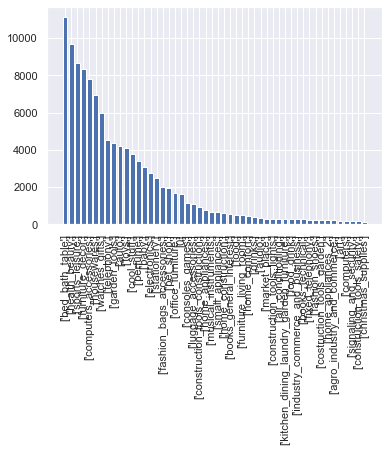

<Figure size 72x360 with 0 Axes>

In [167]:
# Plot 50 largest categories of transactions. (your task)
X=np.arange(len(Bar.head(50)))
Y=Bar['Amount'].head(50)
label=Bar['Name'].head(50)
plt.bar(X,Y)
plt.xticks(X,label)
plt.xticks(rotation=90)
plt.show

**Insight 1:** The most common itemsets consist of a single item.

**Insight 2:** There's a long tail of categories that consist of infrequently purchased items.

**Use `.tolist()` to transform a `DataFrame` or `Series` object into a list.**

In [88]:
# Convert the pandas series to list of lists.
transactions = transactions.tolist()
transactions

[array([0], dtype=object),
 array(['agro_industry_and_commerce'], dtype=object),
 array(['air_conditioning'], dtype=object),
 array(['art'], dtype=object),
 array(['arts_and_crafts'], dtype=object),
 array(['audio'], dtype=object),
 array(['auto'], dtype=object),
 array(['baby'], dtype=object),
 array(['bed_bath_table'], dtype=object),
 array(['books_general_interest'], dtype=object),
 array(['books_imported'], dtype=object),
 array(['books_technical'], dtype=object),
 array(['cds_dvds_music'], dtype=object),
 array(['christmas_supplies'], dtype=object),
 array(['cine_photo'], dtype=object),
 array(['computers'], dtype=object),
 array(['computers_accessories'], dtype=object),
 array(['consoles_games'], dtype=object),
 array(['construction_tools_construction'], dtype=object),
 array(['construction_tools_lights'], dtype=object),
 array(['construction_tools_safety'], dtype=object),
 array(['cool_stuff'], dtype=object),
 array(['costruction_tools_garden'], dtype=object),
 array(['costructi

### **Summarize final transaction data**

In [99]:
# Print length of transactions.
len(orders)

112650

In [105]:
# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]

In [22]:
# Print median number of items in a transaction.
np.median(counts)

1.0

In [23]:
# Print maximum number of items in a transaction.
np.max(counts)

3

---
<center><h1> Problem Set 2</h1> </center>

---

## **Association Rules and Metrics**

**Association rule:** an "if-then" relationship between two itemsets.
  * **rule:** if *{coffee)* then *{milk}*.
  * **antecedent:** coffee
  * **consequent:** milk

**Metric:** a measure of the strength of association between two itemsets.
  * **rule:** if *{coffee)* then *{milk}*
  * **support:** 0.10
  * **leverage:** 0.03



### **One-hot encode the transaction data**

* **One-hot encoding data.**
  * `TransactionEncoder()` instantiates an encoder object.
  * `.fit()` creates mapping between list and one-hot encoding.
  * `.transform()` transforms list into one-hot encoded array.

* **Applying one-hot encoding will transform the list of lists (of transactions) into a `DataFrame`.**
  * The columns correspond to item categories and the rows correspond to transactions. A true indicates that a transaction contains an item from the corresponding category.
* **One-hot encoding simplifies the computation of metrics.**
  * We will also use a one-hot encoded `DataFrame` as an input to different `mlxtend` functions.

In [85]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(Bar)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(Bar)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [81]:
# Print header.
onehot

A      N      a      e      m      n      o      t      u
0   False   True   True   True   True  False  False  False  False
1    True  False  False  False   True   True   True   True   True
2   False  False  False  False  False  False  False  False  False
3   False  False  False  False  False  False  False  False  False
4   False  False  False  False  False  False  False  False  False
..    ...    ...    ...    ...    ...    ...    ...    ...    ...
67  False  False  False  False  False  False  False  False  False
68  False  False  False  False  False  False  False  False  False
69  False  False  False  False  False  False  False  False  False
70  False  False  False  False  False  False  False  False  False
71  False  False  False  False  False  False  False  False  False

[72 rows x 9 columns]


### **Compute the support metric**

* Support measures the frequency with which an itemset appears in a database of transactions.


$$support(X) = \frac{\text{number of transactions containing X}}{\text{total number of transactions}}$$

* `.mean(axis=0)` computes support values for one-hot encoded `DataFrame`.  
* A high support value indicates that items in an itemset are purchased together frequently and, thus, are associated with each other.

In [98]:
# Print support metric over all rows for each column. (your task)
Support=[]
for i in range(len(Bar)):
    Support.append([Bar['Name'][i],Bar['Amount'][i]/len(orders)])
Support

[[[0], 0.014442964935641367],
 [['agro_industry_and_commerce'], 0.0018819351975144251],
 [['air_conditioning'], 0.002636484687083888],
 [['art'], 0.0018553040390590324],
 [['arts_and_crafts'], 0.00021304926764314247],
 [['audio'], 0.003231247225920994],
 [['auto'], 0.037594318686196185],
 [['baby'], 0.027208166888592986],
 [['bed_bath_table'], 0.09866844207723036],
 [['books_general_interest'], 0.004909010208610742],
 [['books_imported'], 0.0005326231691078562],
 [['books_technical'], 0.00237017310252996],
 [['cds_dvds_music'], 0.00012427873945849977],
 [['christmas_supplies'], 0.0013581890812250333],
 [['cine_photo'], 0.0006391478029294274],
 [['computers'], 0.0018020417221482467],
 [['computers_accessories'], 0.06948069241011984],
 [['consoles_games'], 0.010093209054593875],
 [['construction_tools_construction'], 0.008246782068353307],
 [['construction_tools_lights'], 0.002698624056813138],
 [['construction_tools_safety'], 0.0017221482467820683],
 [['cool_stuff'], 0.03369729249889037

**Observation:** In retail and ecommerce settings, any particular item is likely to account for a small share of transactions. Here, we've aggregated up to the product category level and very popular categories are still only present in 5% of transactions. Consequently, itemsets with 2 or more item categories will account for a vanishingly small share of total transactions (e.g. 0.01%).

### **Compute the item count distribution over transactions**

* `onehot.sum(axis=1)` sums across the columns in a `DataFrame`. 

In [27]:
# Print distribution of item counts. (your task)


1    96530
2      711
3       15
dtype: int64

**Insight:** Only 726 transactions contain more than one item category. We may want to consider whether aggregation discards too many multi-item itemsets.

### **Create a column for an itemset with multiple items**

* **We can create multi-item columns using the logical AND operation.**
  * `True & True = True`
  * `True & False = False`
  * `False & True = False`
  * `False & False = False`

In [28]:
# Add sports_leisure and health_beauty to DataFrame.
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

# Print support value.
onehot['sports_leisure_health_beauty'].mean(axis = 0)

0.00014394998766142962

**Insight:** Only 0.014% of transactions contain a product from both the sports and leisure, and health and beauty categories. These are typically the type of numbers we will work with when we set pruning thresholds in the following section.

### **Aggregate the dataset further by combining product sub-categories**

* **We can use the inclusive OR operation to combine multiple categories.**
  * `True | True = True`
  * `True | False = True`
  * `False | True = True`
  * `False | False = False`

In [29]:
# Merge books_imported and books_technical.
onehot['books'] = onehot['books_imported'] | onehot['books_technical']

# Print support values for books, books_imported, and books_technical.
onehot[['books','books_imported','books_technical']].mean(axis=0)

books              0.003218
books_imported     0.000545
books_technical    0.002673
dtype: float64

### **Compute the confidence metric**

* **The support metric doesn't provide information about direction.**
  * $support(antecedent, consequent) = support(consequent, antecedent)$

* **The confidence metric has a direction.**
  * Conditional probability of the consequent, given the antecedent.

$$confidence(antecedent \rightarrow consequent)= \frac{support(antecedent, consequent)}{support(antecedent)}$$

* A high value of confidence indicates that the antecedent and consequent are associated and that the direction of the association runs from the antecedent to the consequent.

In [30]:
# Print confidence metric for sports_leisure -> health_beauty. (your task)
confidence = onehot['sports_leisure'] | onehot['health_beauty']
confidence=len(confidence)/len(onehot)
confidence

0.0018134715025906734

In [41]:
# Print confidence for health_beauty -> sports_leisure. (your task)
confidence = onehot['health_beauty'] | onehot['sports_leisure']
confidence=len(confidence)/len(onehot)
confidence

0.0015844273426889996

**Insight:** $confidence(sports\_leisure \rightarrow health\_beauty)$ was higher than $confidence(health\_beauty \rightarrow sports\_leisure)$. Since the two have the same joint support, the confidence measures will differ only by the antecedent support. The higher confidence metric means that the antecedent has *lower* support.

---
<center><h1> Problem Set 3</h1> </center>

---

## **The Apriori Algorithm and Pruning**

**The Apriori algorithm** identifies frequent (high support) itemsets using something called the Apriori principle, which states that a superset that contains an infrequent item is also infrequent.

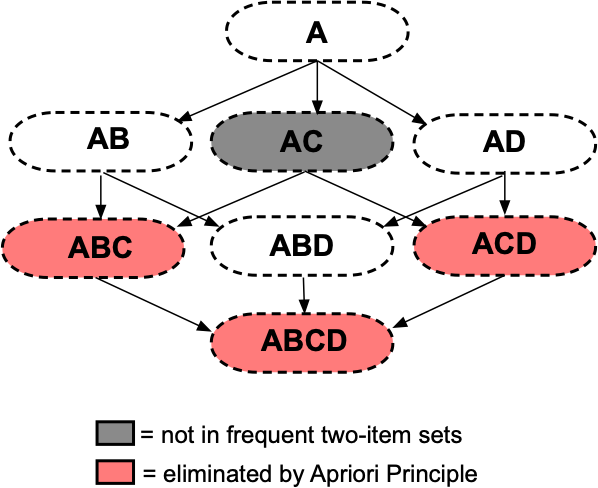

**Pruning** is the process of removing itemsets or association rules, typically based on the application of a metric threshold. 

**The `mlxtend` module will enable us to apply the Apriori algorithm, perform pruning, and compute association rules.**

### **Applying the Apriori algorithm**

* Use `apriori()` to identify frequent itemsets.
* `min_support` set the item frequency threshold used for pruning.

In [32]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01. (your task)

Support = apriori(onehot, min_support=0.01, use_colnames = True)
# Print frequent itemsets. (your task)
Support

support itemsets
0   0.040070      (5)
1   0.029664      (6)
2   0.096827      (7)
3   0.068777     (15)
4   0.010920     (16)
5   0.037345     (20)
6   0.026219     (27)
7   0.019166     (28)
8   0.066310     (40)
9   0.036173     (43)
10  0.090853     (44)
11  0.060500     (50)
12  0.010632     (53)
13  0.013089     (57)
14  0.032512     (59)
15  0.017582     (60)
16  0.079378     (65)
17  0.023762     (66)
18  0.043175     (68)
19  0.039956     (69)
20  0.057827     (70)

**Observation 1:** `apriori` returns a `DataFrame` with a `support` column and an `itemsets` column.

**Observation 2:** By default `apriori` returns itemset numbers, rather than labels. We can change this by using the `use_colnames` parameter.

**Insight:** All itemsets with a support of greater than 0.01 contain a single item.

* Use `use_colnames` to use item names, rather than integer IDs.

In [33]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

support                                   itemsets
0   0.001871               (agro_industry_and_commerce)
1   0.002601                         (air_conditioning)
2   0.002077                                      (art)
3   0.003599                                    (audio)
4   0.040070                                     (auto)
5   0.029664                                     (baby)
6   0.096827                           (bed_bath_table)
7   0.005264                   (books_general_interest)
8   0.002673                          (books_technical)
9   0.001316                       (christmas_supplies)
10  0.001861                                (computers)
11  0.068777                    (computers_accessories)
12  0.010920                           (consoles_games)
13  0.007691          (construction_tools_construction)
14  0.002509                (construction_tools_lights)
15  0.001717                (construction_tools_safety)
16  0.037345                               (cool_stuff)
17  0.001995                 (costruction_tools_garden)
18  0.003054                                   (drinks)
19  0.026219                              (electronics)
20  0.019166                 (fashion_bags_accessories)
21  0.001152                    (fashion_male_clothing)
22  0.002468                            (fashion_shoes)
23  0.001244                  (fashion_underwear_beach)
24  0.002231                          (fixed_telephony)
25  0.004627                                     (food)
26  0.002334                               (food_drink)
27  0.066310                          (furniture_decor)
28  0.004339                    (furniture_living_room)
29  0.036173                             (garden_tools)
30  0.090853                            (health_beauty)
31  0.007856                          (home_appliances)
32  0.002406                        (home_appliances_2)
33  0.004082                             (home_comfort)
34  0.005038                        (home_construction)
35  0.060500                               (housewares)
36  0.002416           (industry_commerce_and_business)
37  0.002550  (kitchen_dining_laundry_garden_furniture)
38  0.010632                      (luggage_accessories)
39  0.002879                             (market_place)
40  0.006457                      (musical_instruments)
41  0.013089                         (office_furniture)
42  0.032512                                  (perfume)
43  0.017582                                 (pet_shop)
44  0.001439                   (signaling_and_security)
45  0.006478                         (small_appliances)
46  0.079378                           (sports_leisure)
47  0.023762                               (stationery)
48  0.043175                                (telephony)
49  0.039956                                     (toys)
50  0.057827                            (watches_gifts)
51  0.003218                                    (books)
52  0.002673                   (books, books_technical)

**Insight:** Lowering the support threshold increased the number of itemsets returned and even yielded itemsets with more than one item.

In [34]:
# Apply apriori algorithm to data with min support threshold of 0.00005. (your task)
frequent_itemsets = apriori(onehot, min_support = 0.0005, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets


support                                           itemsets
0    0.001871                       (agro_industry_and_commerce)
1    0.002601                                 (air_conditioning)
2    0.002077                                              (art)
3    0.000236                                  (arts_and_crafts)
4    0.003599                                            (audio)
..        ...                                                ...
108  0.000051                  (luggage_accessories, stationery)
109  0.000051                    (watches_gifts, sports_leisure)
110  0.000144     (sports_leisure, sports_leisure_health_beauty)
111  0.000062                                 (stationery, toys)
112  0.000144  (sports_leisure, sports_leisure_health_beauty,...

[113 rows x 2 columns]

**Observation:** Notice how low we must set the support threshold (0.005%) to return a high number of itemsets with more than one item.

In [35]:
# Apply apriori algorithm to data with a two-item limit. (your task)


**Insight:** What do we gain from the apriori algorithm? We start off with $2^{71}$ potential itemsets and immediately reduce it to 113 without enumerating all $2^{71}$ itemsets.

### **Computing association rules from Apriori output**

* Use `association_rules()` to compute and prune association rules from output of `apriori()`.

In [36]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001. (your task)
Association=association_rules(Support, metric = 'lift', min_threshold=0.0001)

# Print rules header. (your task)
Association

antecedents        consequents  antecedent support  \
0            (baby)   (bed_bath_table)            0.029664   
1  (bed_bath_table)             (baby)            0.096827   
2            (baby)       (cool_stuff)            0.029664   
3      (cool_stuff)             (baby)            0.037345   
4            (baby)  (furniture_decor)            0.029664   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.096827  0.000175    0.005893  0.060856 -0.002697    0.908527  
1            0.029664  0.000175    0.001805  0.060856 -0.002697    0.972091  
2            0.037345  0.000206    0.006932  0.185633 -0.000902    0.969375  
3            0.029664  0.000206    0.005507  0.185633 -0.000902    0.975709  
4            0.066310  0.000123    0.004159  0.062728 -0.001844    0.937590

**Notice that `association_rules` automatically computes seven metrics.**

### **Pruning association rules**

In [37]:
# Recover association rules using confidence threshold of 0.01. (your task)
Association=association_rules(Support, metric = 'lift', min_threshold=0.01)

# Print rules.
Association

antecedents        consequents  antecedent support  \
0                            (art)  (furniture_decor)            0.002077   
1                          (audio)    (watches_gifts)            0.003599   
2                (furniture_decor)   (bed_bath_table)            0.066310   
3                   (home_comfort)   (bed_bath_table)            0.004082   
4                          (books)   (books_imported)            0.003218   
5                 (books_imported)            (books)            0.000545   
6                          (books)  (books_technical)            0.003218   
7                (books_technical)            (books)            0.002673   
8      (construction_tools_lights)  (furniture_decor)            0.002509   
9          (furniture_living_room)  (furniture_decor)            0.004339   
10                  (home_comfort)  (furniture_decor)            0.004082   
11             (home_construction)  (furniture_decor)            0.005038   
12             (home_construction)     (garden_tools)            0.005038   
13  (sports_leisure_health_beauty)    (health_beauty)            0.000144   
14  (sports_leisure_health_beauty)   (sports_leisure)            0.000144   

    consequent support   support  confidence        lift  leverage  conviction  
0             0.066310  0.000051    0.024752    0.373287 -0.000086    0.957388  
1             0.057827  0.000062    0.017143    0.296452 -0.000146    0.958606  
2             0.096827  0.000720    0.010854    0.112101 -0.005701    0.913084  
3             0.096827  0.000442    0.108312    1.118618  0.000047    1.012881  
4             0.000545  0.000545    0.169329  310.722045  0.000543    1.203190  
5             0.003218  0.000545    1.000000  310.722045  0.000543         inf  
6             0.002673  0.002673    0.830671  310.722045  0.002665    5.889872  
7             0.003218  0.002673    1.000000  310.722045  0.002665         inf  
8             0.066310  0.000113    0.045082    0.679872 -0.000053    0.977770  
9             0.066310  0.000072    0.016588    0.250155 -0.000216    0.949439  
10            0.066310  0.000062    0.015113    0.227921 -0.000209    0.948018  
11            0.066310  0.000134    0.026531    0.400103 -0.000200    0.959137  
12            0.036173  0.000072    0.014286    0.394932 -0.000110    0.977796  
13            0.090853  0.000144    1.000000   11.006790  0.000131         inf  
14            0.079378  0.000144    1.000000   12.597927  0.000133         inf

In [38]:
# Select rules with a consequent support above 0.095. (your task)
consequent=consequent[consequent['consequents']>0.095]
# Print rules. (your task)
consequent

antecedents       consequents  antecedent support  \
2  (furniture_decor)  (bed_bath_table)            0.066310   
3     (home_comfort)  (bed_bath_table)            0.004082   

   consequent support   support  confidence      lift  leverage  conviction  
2            0.096827  0.000720    0.010854  0.112101 -0.005701    0.913084  
3            0.096827  0.000442    0.108312  1.118618  0.000047    1.012881

### **The leverage metric**

* **Leverage provides a sanity check.**
  * $support(antecedent, consequent)$ = joint support in data.
  * $support(antecedent) * support(consequent)$ = expected joint support for unrelated antecedent and consequent.

* **Leverage formula**
  * $$leverage(antecendent, consequent) = 
support(antecedent, consequent) - support(antecedent) * support(consequent)$$

* **For most problems, we will discard itemsets with negative leverage.**
  * Negative leverage means that the items appear together less frequently than we would expect if they were randomly and independently distributed across transactions.

In [39]:
# Select rules with leverage higher than 0.0. (your task)
leverage=leverage[leverage['leverage']>0]

# Print rules. (your task)
leverage

antecedents       consequents  antecedent support  consequent support  \
3  (home_comfort)  (bed_bath_table)            0.004082            0.096827   

    support  confidence      lift  leverage  conviction  
3  0.000442    0.108312  1.118618  0.000047    1.012881

**Insight:** The Apriori algorithm reduced the number of itemsets from $2^{71}$ to 113. Pruning allowed us to identify to a single association rule that could be useful for cross-promotional purposes: $\{home\_comfort\} \rightarrow \{bed\_bath\_table\}$.

### **Visualizing patterns in metrics**

* `sns.scatterplot()` creates a scatterplot from two columns in a `DataFrame`.

<AxesSubplot:xlabel='leverage', ylabel='confidence'>

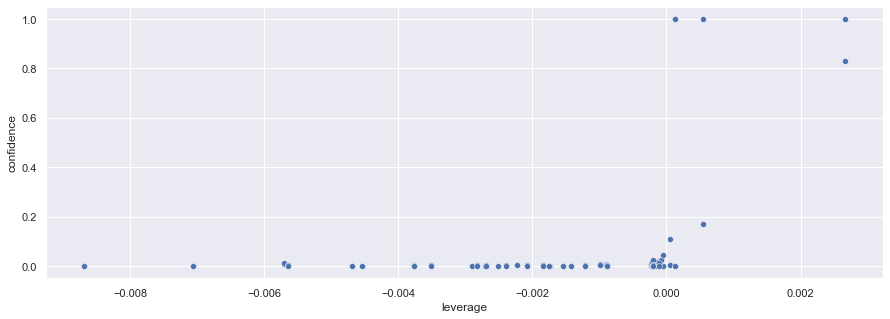

In [40]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)

**Insight 1**: Leverage and confidence contain some of the same information about the strength of an association.